# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [1]:
!pip install kaggle

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
!pwd

/root/shared/Documents/Indiana Coursework/INFO-I 526 Applied ML/AML-project


In [3]:
!mkdir ~/.kaggle
!cp /root/shared/Downloads/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
sample_submission.csv               524KB  2019-12-11 02:55:35  
application_train.csv               158MB  2019-12-11 02:55:35  
bureau.csv                          162MB  2019-12-11 02:55:35  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  
application_test.csv                 25MB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  
previous_application.csv            386MB  2019-12-11 02:55:35  


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [5]:
# ![alt](home_credit.png "Home credit")

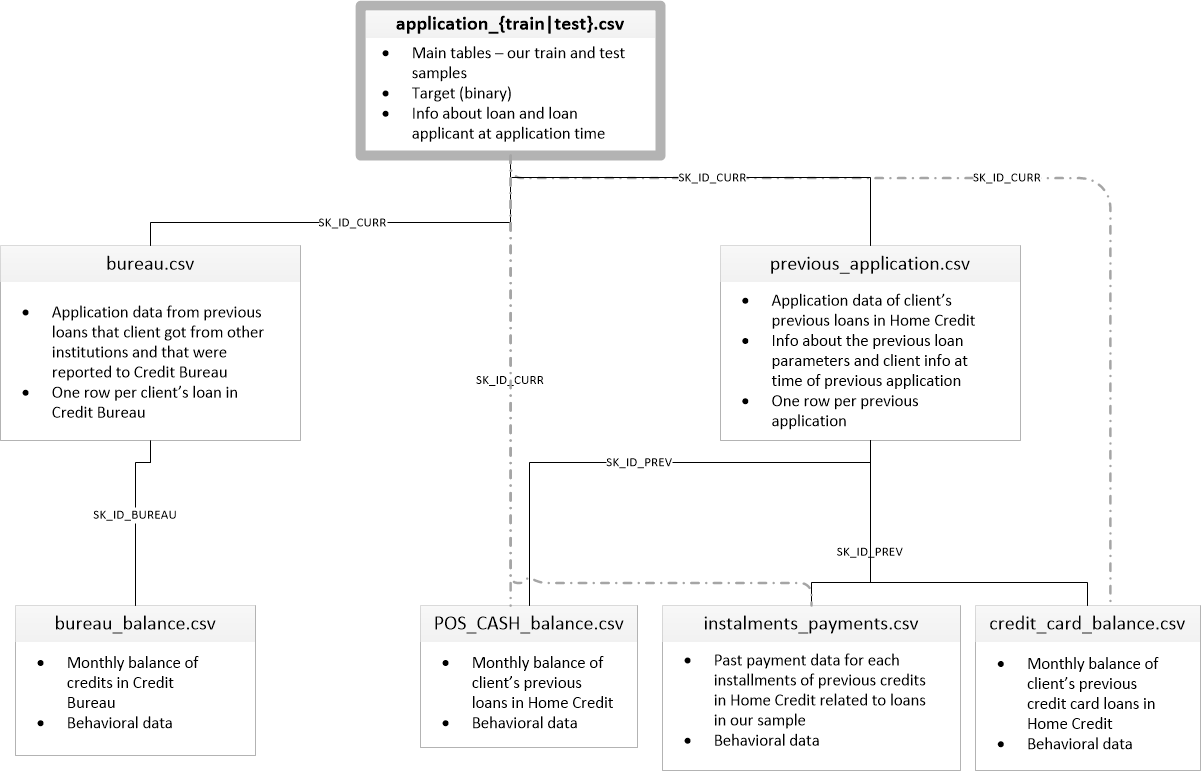

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [6]:
# DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
DATA_DIR = "../Data/home-credit-default-risk"   #same level as course repo in the data directory

print(DATA_DIR)

#DATA_DIR = os.path.join('./ddddd/')
!mkdir $DATA_DIR

../Data/home-credit-default-risk
mkdir: cannot create directory ‘../Data/home-credit-default-risk’: File exists


In [7]:
!ls -l $DATA_DIR

total 3326068
-rw-rw-r-- 1 root root     37383 Dec 11  2019 HomeCredit_columns_description.csv
-rw-rw-r-- 1 root root 392703158 Dec 11  2019 POS_CASH_balance.csv
-rw-rw-r-- 1 root root  26567651 Dec 11  2019 application_test.csv
-rw-rw-r-- 1 root root 166133370 Dec 11  2019 application_train.csv
-rw-rw-r-- 1 root root 170016717 Dec 11  2019 bureau.csv
-rw-rw-r-- 1 root root 375592889 Dec 11  2019 bureau_balance.csv
-rw-rw-r-- 1 root root 424582605 Dec 11  2019 credit_card_balance.csv
-rw-r--r-- 1 root root 721616255 Nov 10 07:15 home-credit-default-risk.zip
-rw-rw-r-- 1 root root 723118349 Dec 11  2019 installments_payments.csv
-rw-rw-r-- 1 root root 404973293 Dec 11  2019 previous_application.csv
-rw-rw-r-- 1 root root    536202 Dec 11  2019 sample_submission.csv


In [8]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

home-credit-default-risk.zip: Skipping, found more recently modified local copy (use --force to force download)


### Imports

In [9]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [10]:
unzippingReq = False
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile('application_train.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('application_test.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('credit_card_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('installments_payments.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('POS_CASH_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('previous_application.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

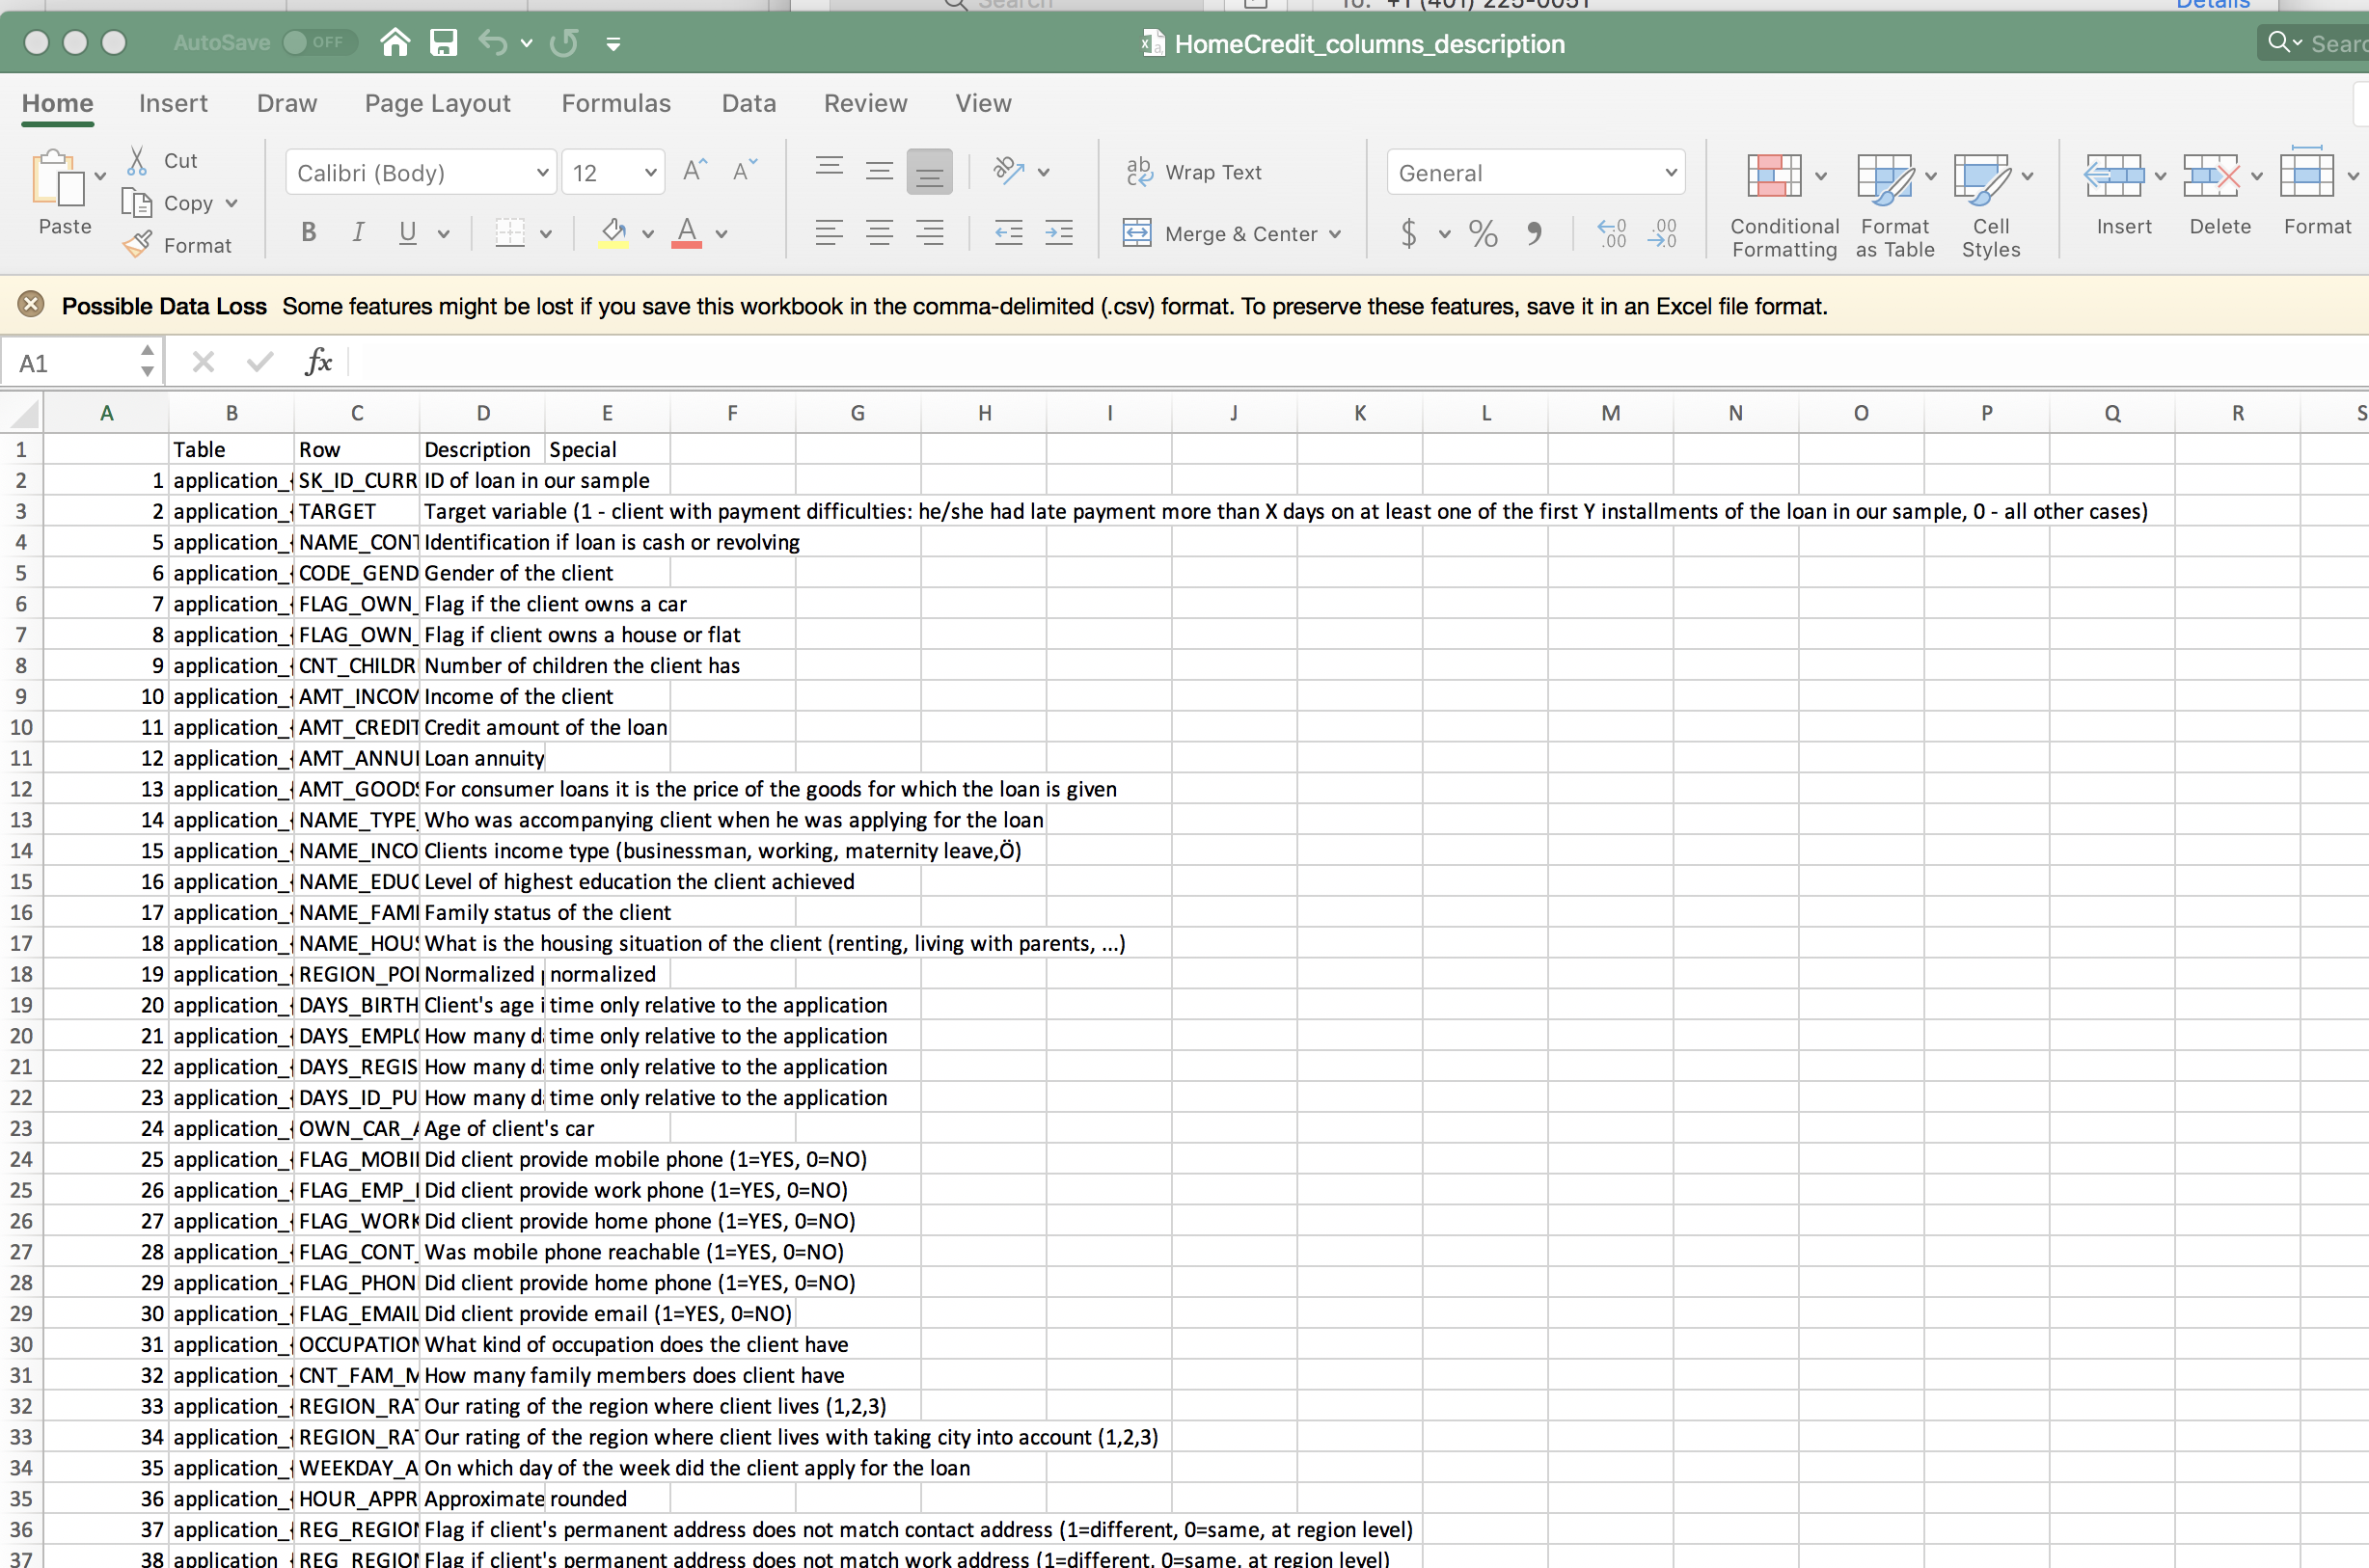

### Application train

In [11]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [12]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [13]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 35.3 s, sys: 21.5 s, total: 56.7 s
Wall time: 1min 22s


In [14]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis
<a id='eda'></a> 

## Summary of Application train

#### Summary Statistics

In [10]:
print('\033[1m' + "Size of each dataset : " + '\033[0m' , end = '\n' * 2)
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]:4}]')

Size of each dataset : 

dataset application_train       : [    307,511,  122]
dataset application_test        : [     48,744,  121]
dataset bureau                  : [  1,716,428,   17]
dataset bureau_balance          : [ 27,299,925,    3]
dataset credit_card_balance     : [  3,840,312,   23]
dataset installments_payments   : [ 13,605,401,    8]
dataset previous_application    : [  1,670,214,   37]
dataset POS_CASH_balance        : [ 10,001,358,    8]


In [11]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [12]:
datasets["application_train"].describe() #numerical only features

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [13]:
datasets["application_test"].describe() #numerical only features

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

In [14]:
datasets["application_train"].describe(include='all') #look at all categorical and numerical

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

In [15]:
from IPython.display import display, HTML
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Full stats

def stats_summary1(df, df_name):
    print(datasets[df_name].info(verbose=True, null_counts=True ))
    print("-----"*15)
    print(f"Shape of the df {df_name} is {df.shape} \n")
    print("-----"*15)
    print(f"Statistical summary of {df_name} is :")
    print("-----"*15)
    print(f"Description of the df {df_name}:\n")
    print(display(HTML(np.round(datasets['application_train'].describe(),2).to_html()))) 
    #print(f"Description of the df {df_name}:\n",np.round(datasets['application_train'].describe(),2))

def stats_summary2(df, df_name):   
    print(f"Description of the df continued for {df_name}:\n")
    print("-----"*15)
    print("Data type value counts: \n",df.dtypes.value_counts())
    print("\nReturn number of unique elements in the object. \n")
    print(df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
    

# List the categorical and Numerical features of a DF
def feature_datatypes_groups(df, df_name):
    df_dtypes = df.columns.to_series().groupby(df.dtypes).groups
    print("-----"*15)
    print(f"Categorical and Numerical(int + float) features  of {df_name}.")
    print("-----"*15)
    print()
    for k, v in df_dtypes.items():
        print({k.name: v})
        print("---"*10)
    print("\n \n")    
        
# Null data list and plot.        
def null_data_plot(df, df_name):
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
    sum_missing = df.isna().sum().sort_values(ascending = False)
    missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
    missing_data=missing_data[missing_data['Percent'] > 0] 
    print("-----"*15)
    print("-----"*15)
    print('\n The Missing Data: \n')
#     display(missing_data)  # display few
    if len(missing_data)==0:
        print("No missing Data")
    else:
        display(HTML(missing_data.to_html()))  # display all the rows
        print("-----"*15)
        if len(df.columns)> 35:
            f,ax =plt.subplots(figsize=(8,15))
        else: 
            f,ax =plt.subplots()
      #plt.xticks(rotation='90')
      #fig=sns.barplot(missing_data.index, missing_data["Percent"],alpha=0.8)
      #plt.xlabel('Features', fontsize=15)
      #plt.ylabel('Percent of missing values', fontsize=15)
        plt.title(f'Percent missing data for {df_name}.', fontsize=10)
        fig=sns.barplot(missing_data["Percent"],missing_data.index ,alpha=0.8)
        plt.xlabel('Percent of missing values', fontsize=10)
        plt.ylabel('Features', fontsize=10)
        plt.show()
        return missing_data


# Full consolidation of all the stats function.
def display_stats(df, df_name):
    print("--"*40)
    print(" "*20 + '\033[1m'+ df_name +  '\033[0m' +" "*20)
    print("--"*40)
    stats_summary1(df, df_name)

def display_feature_info(df, df_name):
    stats_summary2(df, df_name)
    feature_datatypes_groups(df, df_name)
    null_data_plot(df, df_name)

In [16]:
display_stats(datasets['application_train'], 'application_train')

--------------------------------------------------------------------------------
                    application_train                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float

None


Description of the df continued for application_train:

---------------------------------------------------------------------------
Data type value counts: 
 float64    65
int64      41
object     16
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of application_train.
------------------------------------------------

---------------------------------------------------------------------------


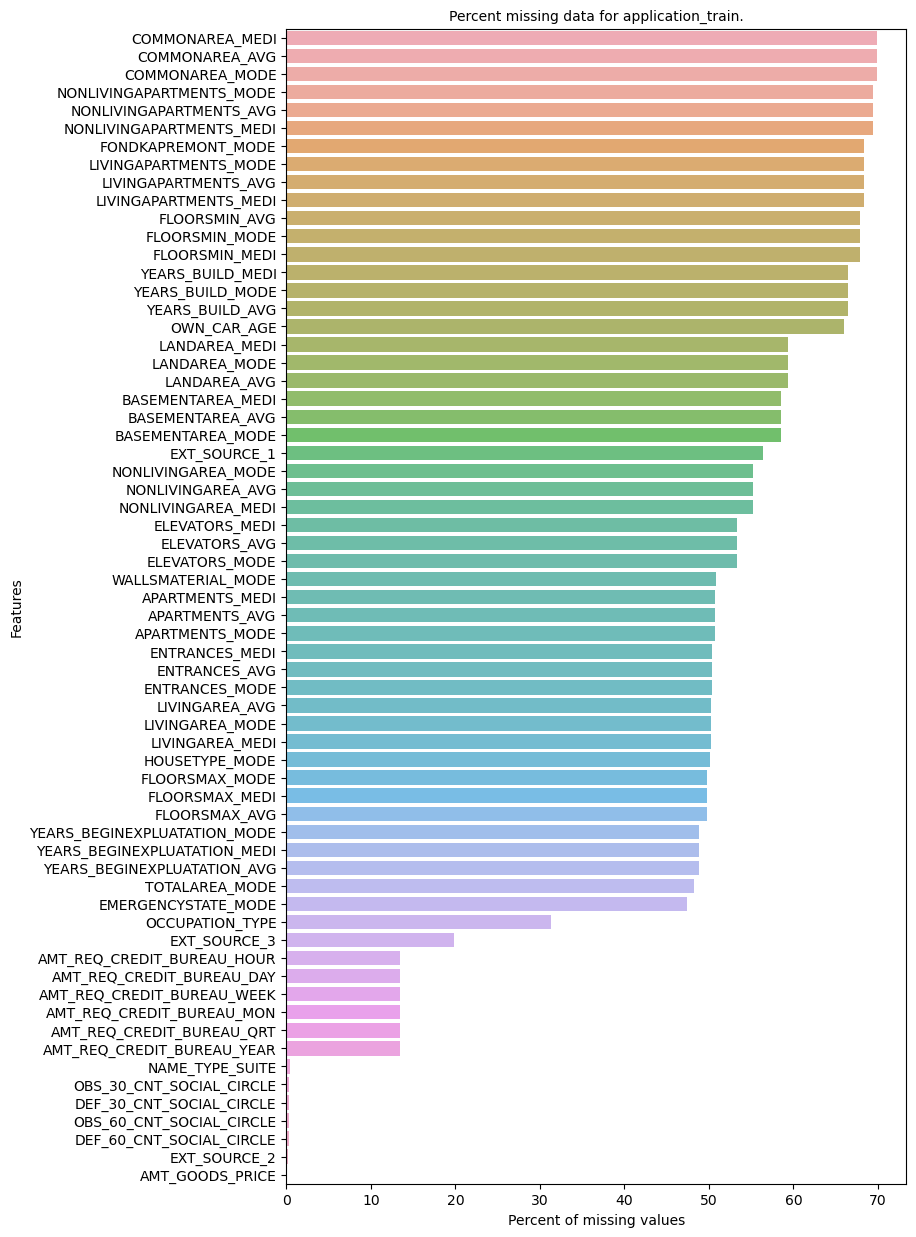

In [17]:
display_feature_info(datasets['application_train'], 'application_train')

#### Commentary
We can see from the descriptive statistics for Days Birth, Days employed, Days registration, Days Id publish which is a negative value and is not expected.
* Own car age has a max of 91.
* Living space and realty has redundant features. This can be used for imputing the features and avaoid any issues.

## Missing data for application train

In [18]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
COMMONAREA_MEDI             69.87               214865
COMMONAREA_AVG              69.87               214865
COMMONAREA_MODE             69.87               214865
NONLIVINGAPARTMENTS_MODE    69.43               213514
NONLIVINGAPARTMENTS_AVG     69.43               213514
NONLIVINGAPARTMENTS_MEDI    69.43               213514
FONDKAPREMONT_MODE          68.39               210295
LIVINGAPARTMENTS_MODE       68.35               210199
LIVINGAPARTMENTS_AVG        68.35               210199
LIVINGAPARTMENTS_MEDI       68.35               210199
FLOORSMIN_AVG               67.85               208642
FLOORSMIN_MODE              67.85               208642
FLOORSMIN_MEDI              67.85               208642
YEARS_BUILD_MEDI            66.50               204488
YEARS_BUILD_MODE            66.50               204488
YEARS_BUILD_AVG             66.50               204488
OWN_CAR_AGE                 65.99               202929
LANDAREA_MEDI               59.38               182590
LANDAREA_MODE               59.38               182590
LANDAREA_AVG                59.38               182590

In [19]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

Percent  Test Missing Count
COMMONAREA_AVG              68.72               33495
COMMONAREA_MODE             68.72               33495
COMMONAREA_MEDI             68.72               33495
NONLIVINGAPARTMENTS_AVG     68.41               33347
NONLIVINGAPARTMENTS_MODE    68.41               33347
NONLIVINGAPARTMENTS_MEDI    68.41               33347
FONDKAPREMONT_MODE          67.28               32797
LIVINGAPARTMENTS_AVG        67.25               32780
LIVINGAPARTMENTS_MODE       67.25               32780
LIVINGAPARTMENTS_MEDI       67.25               32780
FLOORSMIN_MEDI              66.61               32466
FLOORSMIN_AVG               66.61               32466
FLOORSMIN_MODE              66.61               32466
OWN_CAR_AGE                 66.29               32312
YEARS_BUILD_AVG             65.28               31818
YEARS_BUILD_MEDI            65.28               31818
YEARS_BUILD_MODE            65.28               31818
LANDAREA_MEDI               57.96               28254
LANDAREA_AVG                57.96               28254
LANDAREA_MODE               57.96               28254

## Distribution of the target column 
<a id='tar_dist'></a> 

Explore the distribution of values taken on by the target variable.

In [20]:
datasets["application_train"].groupby(['TARGET'])['SK_ID_CURR'].count()

TARGET
0    282686
1     24825
Name: SK_ID_CURR, dtype: int64

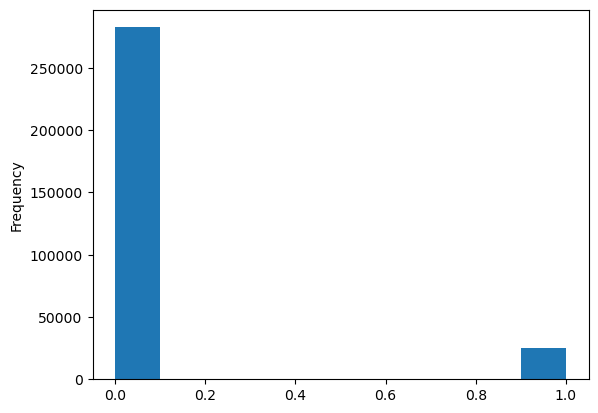

In [21]:
datasets["application_train"]['TARGET'].plot.hist()
plt.show()

#### Days Employed

In [22]:
datasets["application_train"]['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

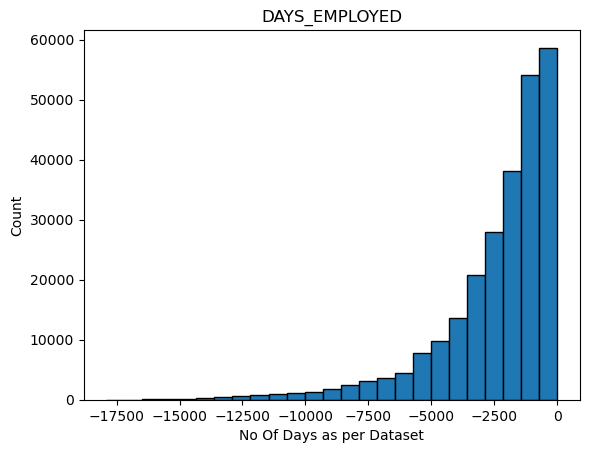

In [23]:
df_app_train=datasets["application_train"].copy()
df_app_train['DAYS_EMPLOYED_ANOM'] = df_app_train['DAYS_EMPLOYED'] == 365243
df_app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)
plt.hist(df_app_train['DAYS_EMPLOYED'],edgecolor = 'k', bins = 25)
plt.title('DAYS_EMPLOYED'); plt.xlabel('No Of Days as per Dataset'); plt.ylabel('Count');
plt.show()

Number of Days employed is an important feature that can be used for predicting risk. However, the histogram shows that the data is not logical.

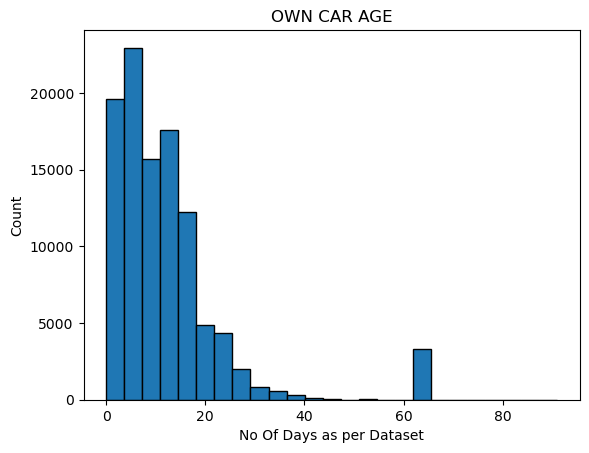

In [24]:
plt.hist(datasets["application_train"]['OWN_CAR_AGE'],edgecolor = 'k', bins = 25)
plt.title('OWN CAR AGE'); plt.xlabel('No Of Days as per Dataset'); plt.ylabel('Count');
plt.show()

There are number of applications that we can see from the histogram for those who have cars over 60 years old.

#### Commentary 

Application Train dataset contains most of the details with respect to loan requests.
There are many missing values and this can be a matter of concern in this dataset and we need to impute these missing values.
Occupation Type and Organization Type are categorical values that have 58 and 18 categories respectively. This can be useful in feature engineering.

#### Applicants Age

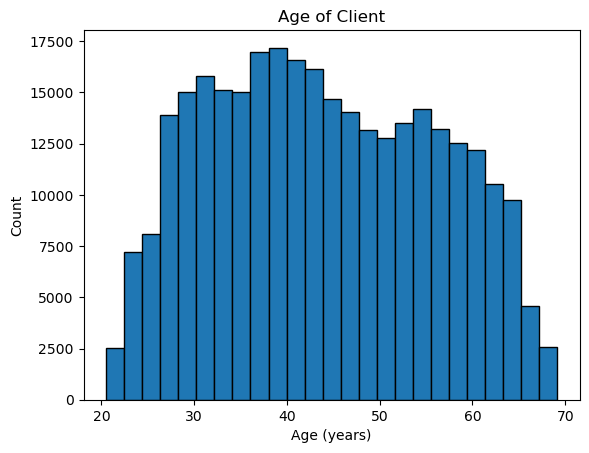

In [25]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

#### Applicants Occupation

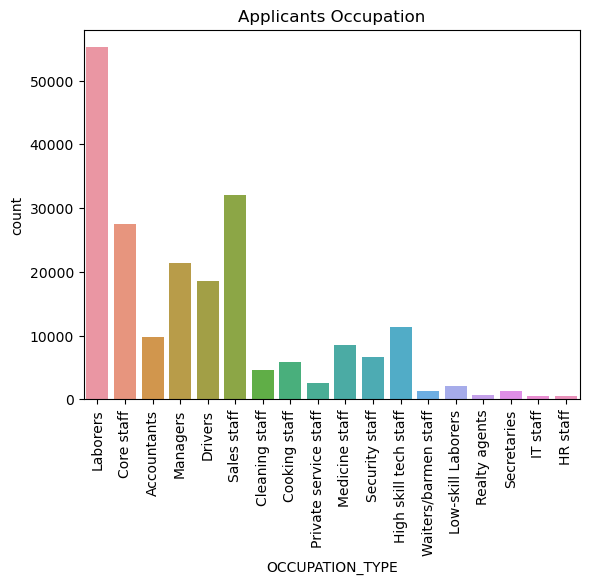

In [26]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);
plt.show()

#### Distribution of AMT_CREDIT

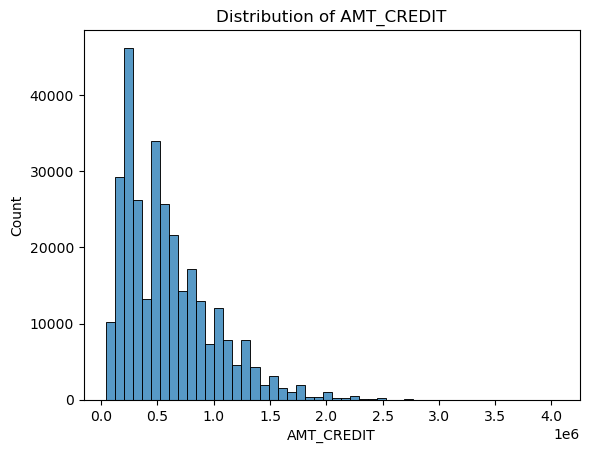

In [27]:
sns.histplot(x='AMT_CREDIT', data=datasets["application_train"], bins=50);
plt.title('Distribution of AMT_CREDIT');
plt.show()
#Credit amounts are right skewed and outlier exists

#### Visualize Income vs Loan Amount identified by default

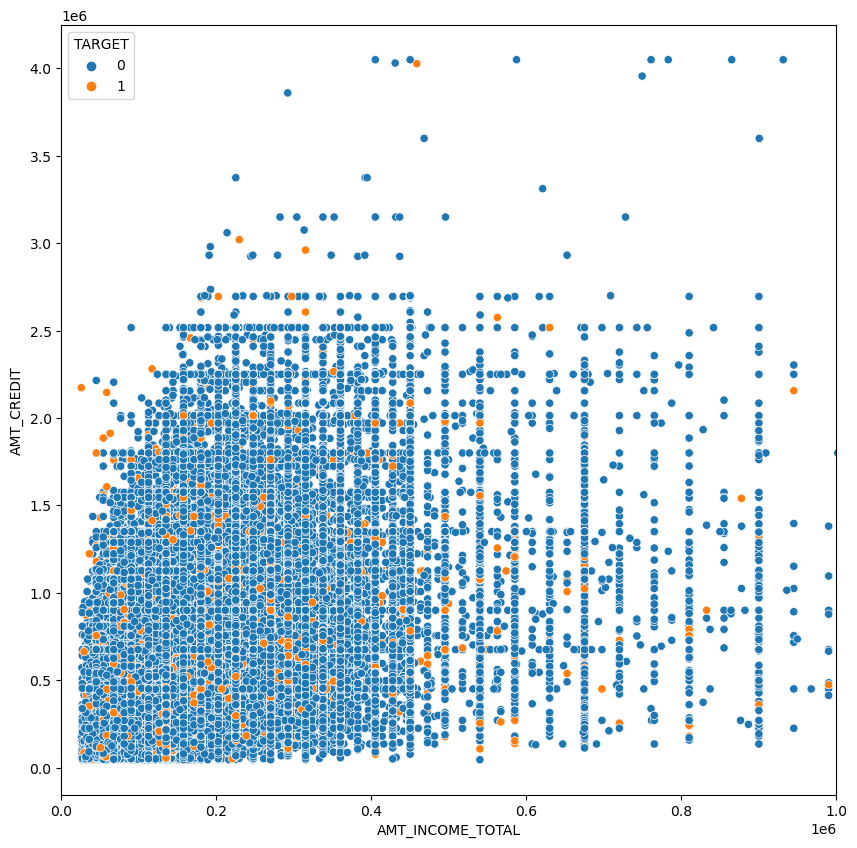

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
f = sns.scatterplot(data = datasets["application_train"], x = 'AMT_INCOME_TOTAL', y = 'AMT_CREDIT', hue = 'TARGET')
f.set(xlim=(0, 1000000))
plt.show()

#### Boxplot of AMT_CREDIT vs NAME_EDUCATION_TYPE with NAME_FAMILY_STATUS hue

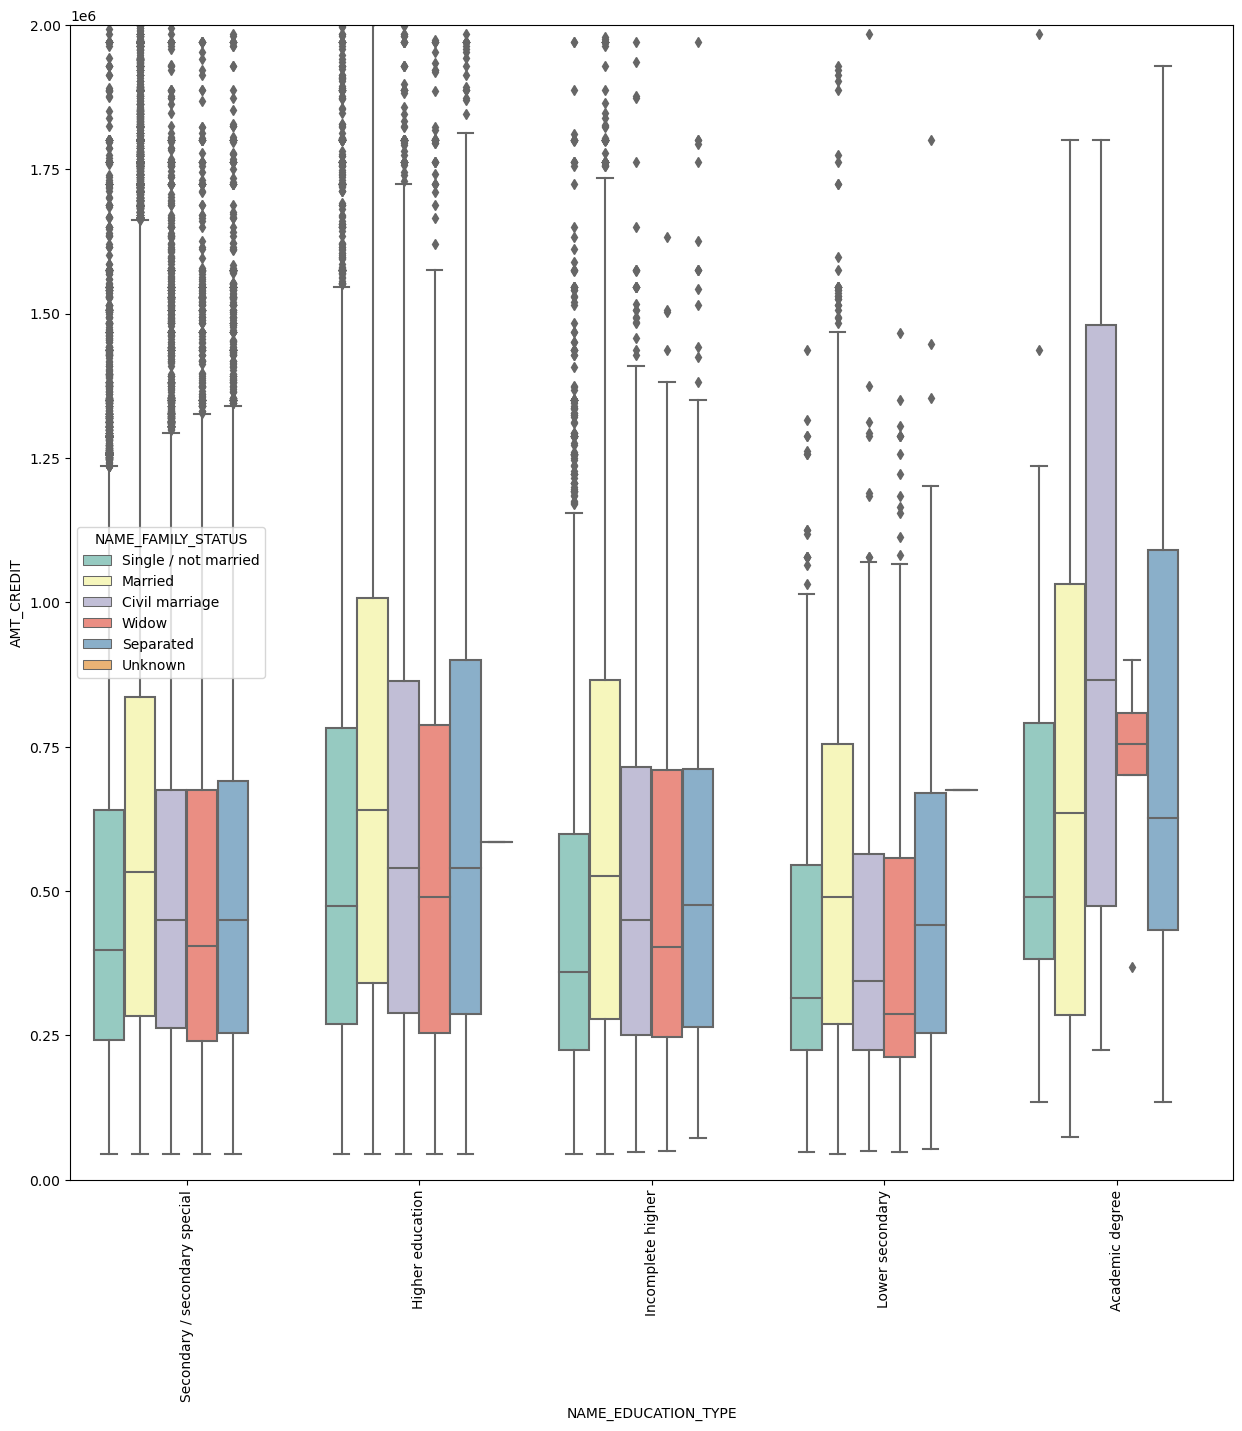

In [29]:
plt.subplots(figsize=(15, 15))
d = sns.boxplot(x = datasets["application_train"]['NAME_EDUCATION_TYPE'],
            y = datasets["application_train"]['AMT_CREDIT'],
            hue = datasets["application_train"]['NAME_FAMILY_STATUS'], palette="Set3")
d.set(ylim=(0, 2000000))
plt.xticks(rotation=90)
plt.show()

## Correlation with  the target column 

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


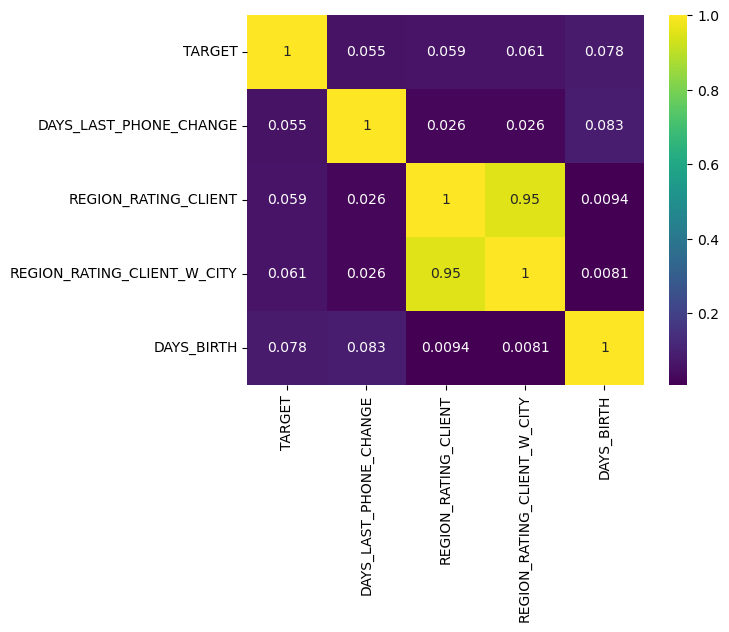

In [30]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))

pos = datasets["application_train"][['TARGET','DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH']]
pos_corr = pos.corr()
sns.heatmap(pos_corr, annot = True, cmap='viridis')
plt.show()


Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


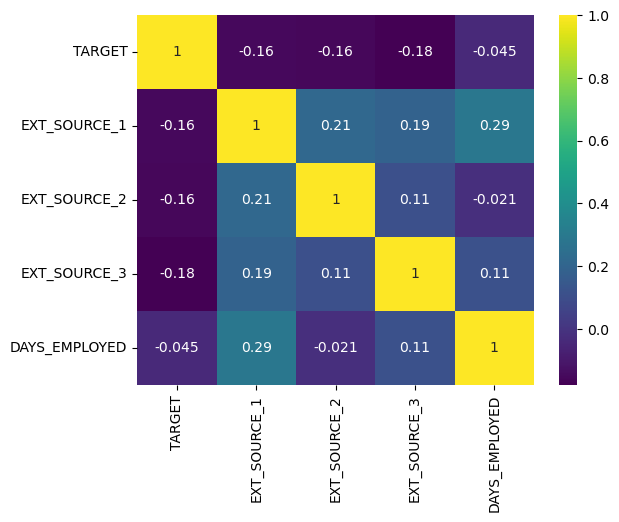

In [31]:
print('\nMost Negative Correlations:\n', correlations.head(10))

neg = datasets["application_train"][['TARGET','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_EMPLOYED']]
neg_corr = neg.corr()
sns.heatmap(neg_corr, annot = True, cmap='viridis')
plt.show()

The distribution of the top correlated features are plotted below.

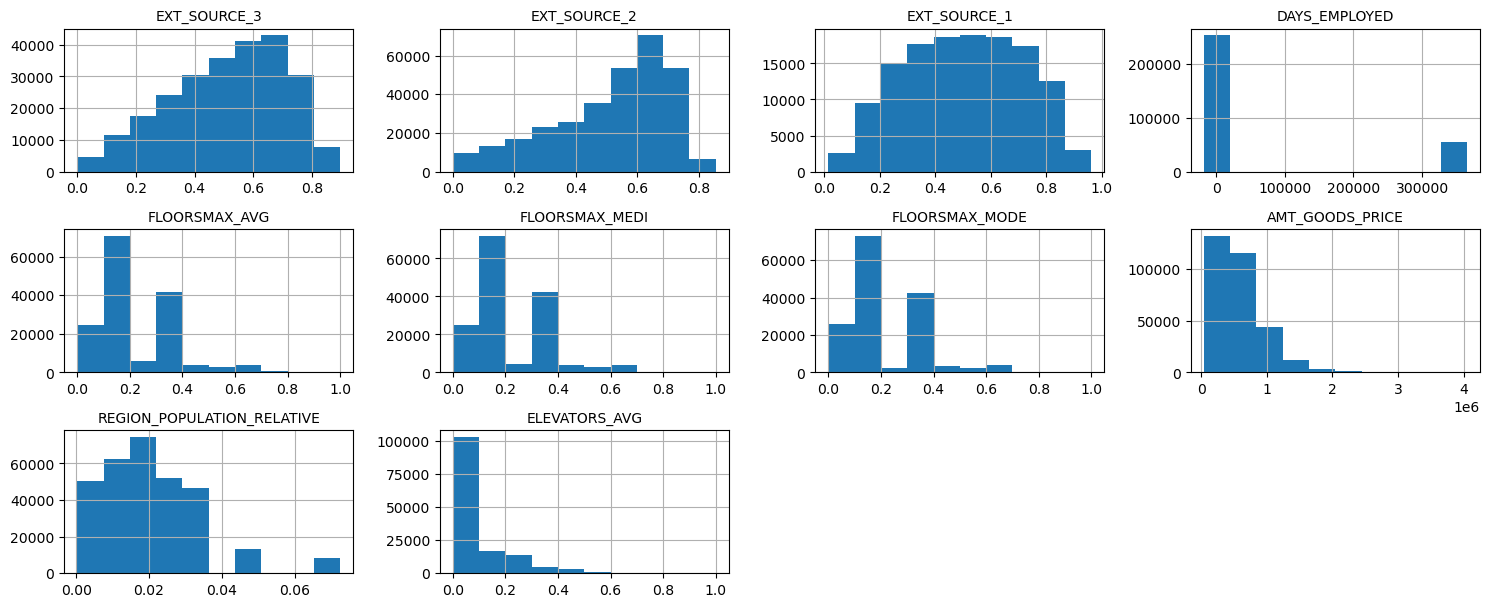

In [32]:
var_neg_corr = correlations.head(10).index.values
numVar = var_neg_corr.shape[0]

plt.figure(figsize=(15,20))
for i,var in enumerate(var_neg_corr):    
    dflt_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,var]
    dflt_non_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,var]
    
    plt.subplot(numVar,4,i+1)
    datasets["application_train"][var].hist()
    plt.title(var, fontsize = 10)
    plt.tight_layout()
plt.show()

Density plots of correlated features are plotted below

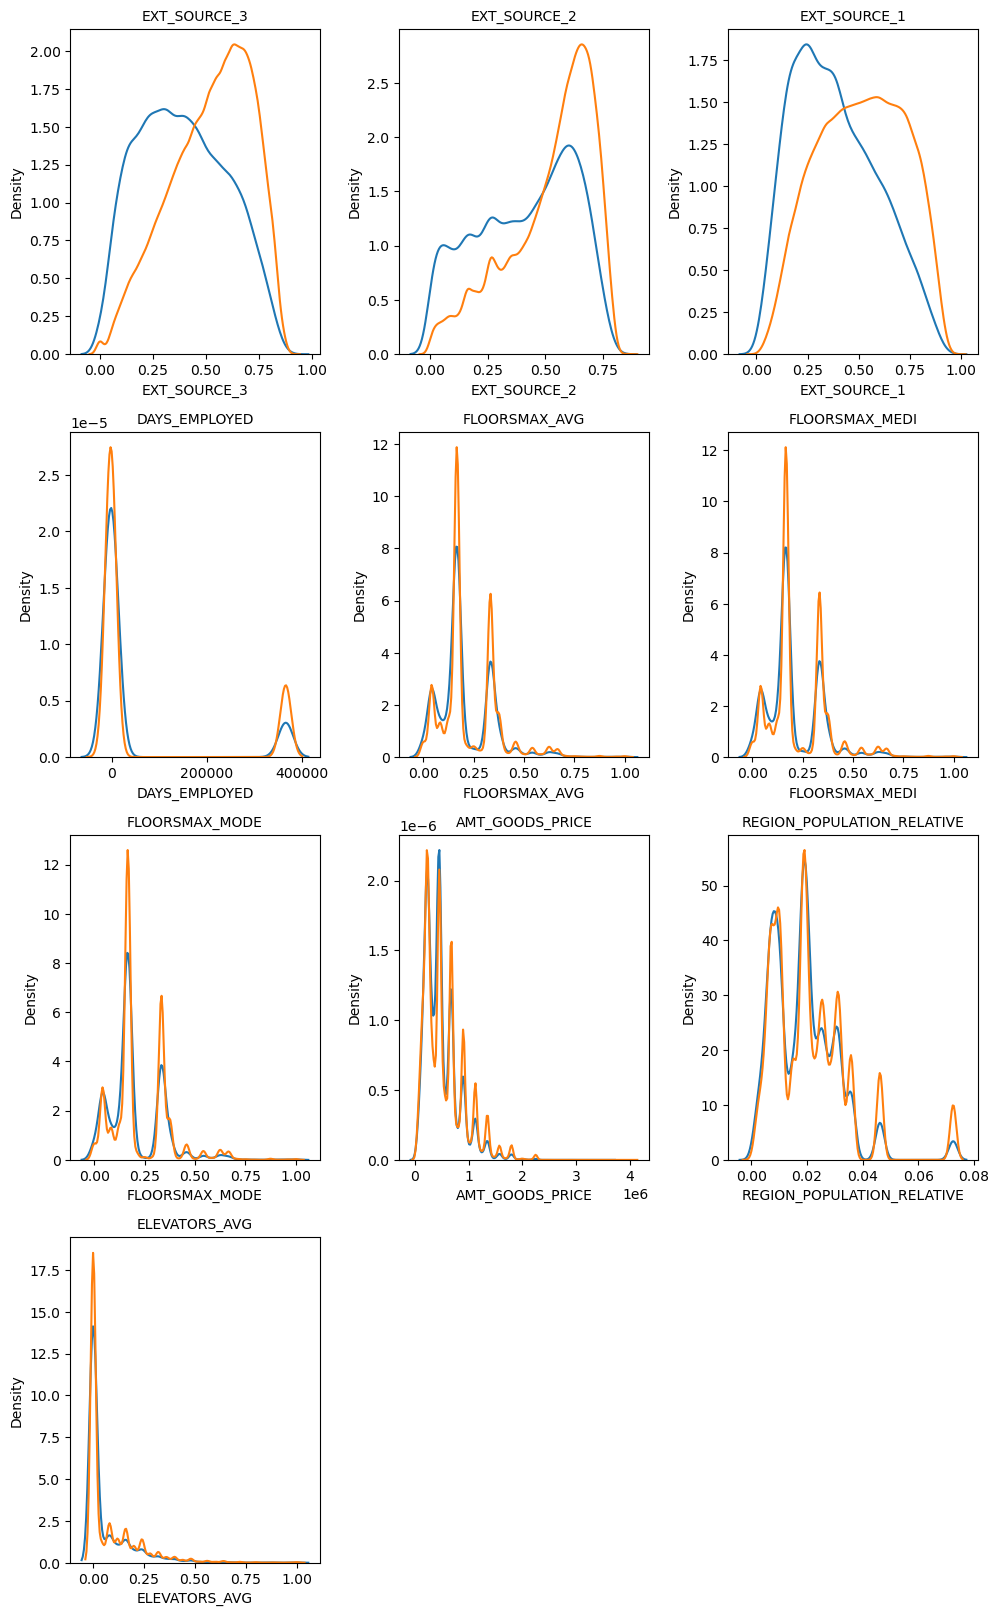

In [33]:
var_neg_corr = correlations.head(10).index.values
numVar = var_neg_corr.shape[0]

plt.figure(figsize=(10,40))
for i,var in enumerate(var_neg_corr):    
    dflt_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,var]
    dflt_non_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,var]
    
    plt.subplot(numVar,3,i+1)
    plt.subplots_adjust(wspace=2)
    sns.kdeplot(dflt_var,label='Default')
    sns.kdeplot(dflt_non_var,label='No Default')
    #plt.xlabel(var)
    plt.ylabel('Density')
    plt.title(var, fontsize = 10)
    plt.tight_layout()
plt.show()

# Dataset questions
## Unique record for each SK_ID_CURR

In [34]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [35]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [36]:
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [37]:
datasets["application_test"].shape

(48744, 121)

In [38]:
datasets["application_train"].shape

(307511, 122)

## previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [39]:
appsDF = datasets["previous_application"]

In [40]:
appsDF.shape

(1670214, 37)

In [41]:
len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"]))

47800

In [42]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [43]:
# How many entries are there for each month?
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)
#prevAppCounts

In [44]:
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications

101

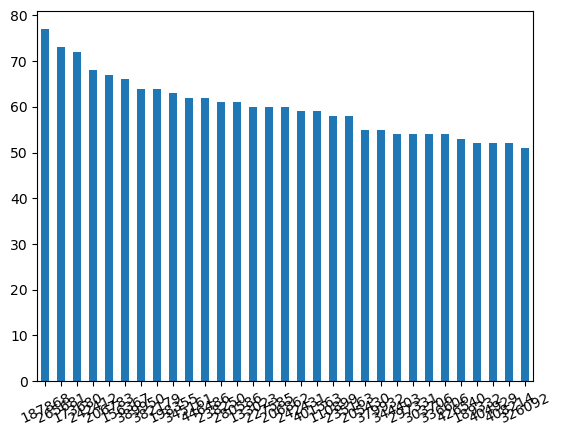

In [45]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

### Histogram of Number of previous applications for an ID

In [46]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

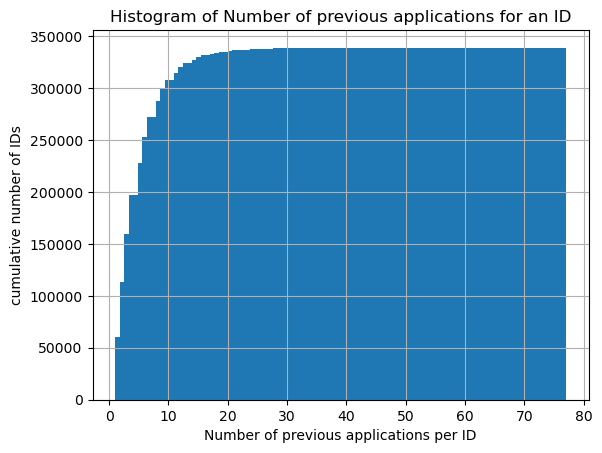

In [47]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')
plt.show()

##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [48]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


#### Bureau Statistics

In [49]:
display_stats(datasets['bureau'], 'bureau')

--------------------------------------------------------------------------------
                    bureau                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SU

None


Description of the df continued for bureau:

---------------------------------------------------------------------------
Data type value counts: 
 float64    8
int64      6
object     3
dtype: int64

Return number of unique elements in the object. 

CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of bureau.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'CNT_CREDIT_PROLONG', 'DAYS_CREDIT_UPDATE'],
      dtype='object')}
------------------------------
{'float64': Index(['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY'],
      dtype='object')}
------------------------------
{'ob

---------------------------------------------------------------------------


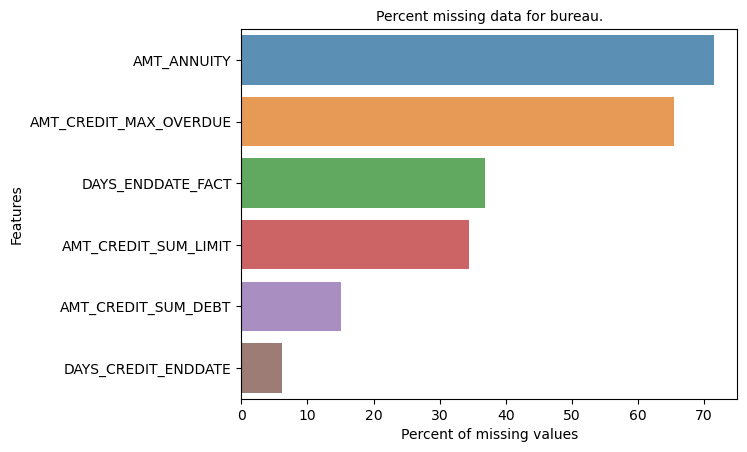

In [50]:
display_feature_info(datasets['bureau'], 'bureau')

#### Statistics of Bureau Balance

In [51]:
display_stats(datasets['bureau_balance'], 'bureau_balance')

--------------------------------------------------------------------------------
                    bureau_balance                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   SK_ID_BUREAU    27299925 non-null  int64 
 1   MONTHS_BALANCE  27299925 non-null  int64 
 2   STATUS          27299925 non-null  object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None
---------------------------------------------------------------------------
Shape of the df bureau_balance is (27299925, 3) 

---------------------------------------------------------------------------
Statistical summary of bureau_balance is :
---------------------------------------------------------------------------
Description of the df bureau_balance:



None


In [52]:
display_feature_info(datasets['bureau_balance'], 'bureau_balance')

Description of the df continued for bureau_balance:

---------------------------------------------------------------------------
Data type value counts: 
 int64     2
object    1
dtype: int64

Return number of unique elements in the object. 

STATUS    8
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of bureau_balance.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_BUREAU', 'MONTHS_BALANCE'], dtype='object')}
------------------------------
{'object': Index(['STATUS'], dtype='object')}
------------------------------

 

---------------------------------------------------------------------------
---------------------------------------------------------------------------

 The Missing Data: 

No missing Data


#### Commentary

As we can see Bureau Balance does not have any missing values. Bureau has some percentage of missing data as plottee above. Bureau and Bureau Balance can be used to provide accurate aggregate features.

#### Statistics fo Credit Card balance

In [53]:
display_stats(datasets['credit_card_balance'], 'credit_card_balance')

--------------------------------------------------------------------------------
                    credit_card_balance                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_PREV                  3840312 non-null  int64  
 1   SK_ID_CURR                  3840312 non-null  int64  
 2   MONTHS_BALANCE              3840312 non-null  int64  
 3   AMT_BALANCE                 3840312 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL     3840312 non-null  int64  
 5   AMT_DRAWINGS_ATM_CURRENT    3090496 non-null  float64
 6   AMT_DRAWINGS_CURRENT        3840312 non-null  float64
 7   AMT_DRAWINGS_OTHER_CURRENT  3090496 non-null  float64
 8   AMT_DRAWINGS_POS_CURRENT    3090496 non-null  float64
 9   AMT_INST_MI

None


Description of the df continued for credit_card_balance:

---------------------------------------------------------------------------
Data type value counts: 
 float64    15
int64       7
object      1
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_STATUS    7
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of credit_card_balance.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL',
       'CNT_DRAWINGS_CURRENT', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')}
------------------------------
{'float64': Index(['AMT_BALANCE', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT',
       'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT',
       'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT',
       'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL

---------------------------------------------------------------------------


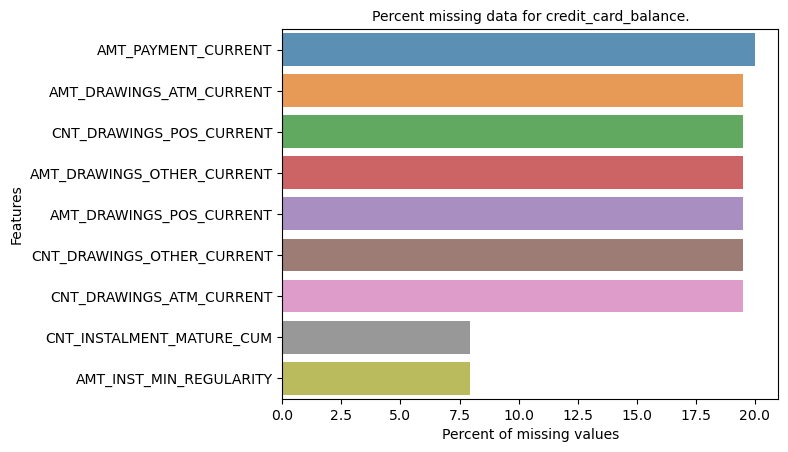

In [54]:
display_feature_info(datasets['credit_card_balance'], 'credit_card_balance')

#### Statistics of Payment Installments

In [55]:
display_stats(datasets['installments_payments'], 'installments_payments')

--------------------------------------------------------------------------------
                    installments_payments                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Non-Null Count     Dtype  
---  ------                  --------------     -----  
 0   SK_ID_PREV              13605401 non-null  int64  
 1   SK_ID_CURR              13605401 non-null  int64  
 2   NUM_INSTALMENT_VERSION  13605401 non-null  float64
 3   NUM_INSTALMENT_NUMBER   13605401 non-null  int64  
 4   DAYS_INSTALMENT         13605401 non-null  float64
 5   DAYS_ENTRY_PAYMENT      13602496 non-null  float64
 6   AMT_INSTALMENT          13605401 non-null  float64
 7   AMT_PAYMENT             13602496 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None
---------------------------------------------

None


Description of the df continued for installments_payments:

---------------------------------------------------------------------------
Data type value counts: 
 float64    5
int64      3
dtype: int64

Return number of unique elements in the object. 

Series([], dtype: float64)
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of installments_payments.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_NUMBER'], dtype='object')}
------------------------------
{'float64': Index(['NUM_INSTALMENT_VERSION', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')}
------------------------------

 

---------------------------------------------------------------------------
---------------------------------------------------------------------------

 The Missing Data: 



---------------------------------------------------------------------------


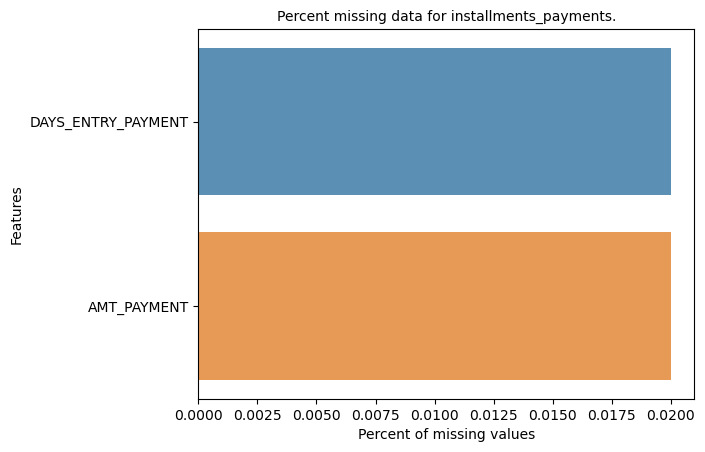

In [56]:
display_feature_info(datasets['installments_payments'], 'installments_payments')

#### Statistics of POS_CASH_balance

In [57]:
display_stats(datasets['POS_CASH_balance'], 'POS_CASH_balance')

--------------------------------------------------------------------------------
                    POS_CASH_balance                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   SK_ID_PREV             10001358 non-null  int64  
 1   SK_ID_CURR             10001358 non-null  int64  
 2   MONTHS_BALANCE         10001358 non-null  int64  
 3   CNT_INSTALMENT         9975287 non-null   float64
 4   CNT_INSTALMENT_FUTURE  9975271 non-null   float64
 5   NAME_CONTRACT_STATUS   10001358 non-null  object 
 6   SK_DPD                 10001358 non-null  int64  
 7   SK_DPD_DEF             10001358 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None
------------------------------------------------

None


Description of the df continued for POS_CASH_balance:

---------------------------------------------------------------------------
Data type value counts: 
 int64      5
float64    2
object     1
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_STATUS    9
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of POS_CASH_balance.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'SK_DPD', 'SK_DPD_DEF'], dtype='object')}
------------------------------
{'float64': Index(['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE'], dtype='object')}
------------------------------
{'object': Index(['NAME_CONTRACT_STATUS'], dtype='object')}
------------------------------

 

---------------------------------------------------------------------------
------------------------------------------------------------

---------------------------------------------------------------------------


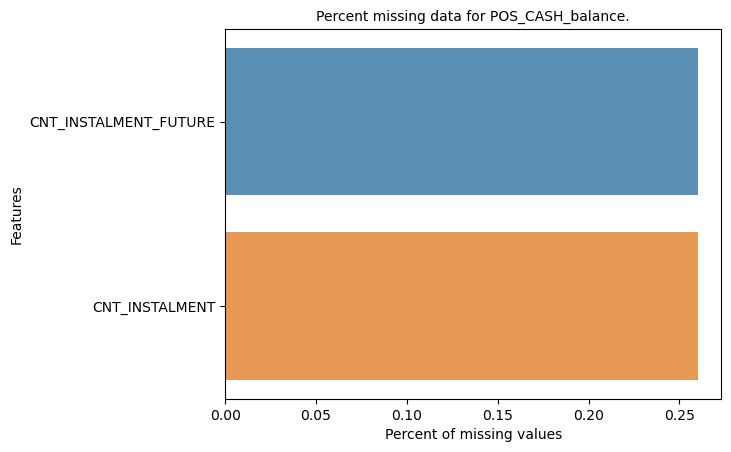

In [58]:
display_feature_info(datasets['POS_CASH_balance'], 'POS_CASH_balance')

#### Aplpication Test Statistics

In [59]:
display_stats(datasets['application_test'], 'application_test')

--------------------------------------------------------------------------------
                    application_test                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    SK_ID_CURR                    48744 non-null  int64  
 1    NAME_CONTRACT_TYPE            48744 non-null  object 
 2    CODE_GENDER                   48744 non-null  object 
 3    FLAG_OWN_CAR                  48744 non-null  object 
 4    FLAG_OWN_REALTY               48744 non-null  object 
 5    CNT_CHILDREN                  48744 non-null  int64  
 6    AMT_INCOME_TOTAL              48744 non-null  float64
 7    AMT_CREDIT                    48744 non-null  float64
 8    AMT_ANNUITY                   48720 non-null  float64
 9    AMT_G

None


Description of the df continued for application_test:

---------------------------------------------------------------------------
Data type value counts: 
 float64    65
int64      40
object     16
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of application_test.
--------------------------------------------------

---------------------------------------------------------------------------


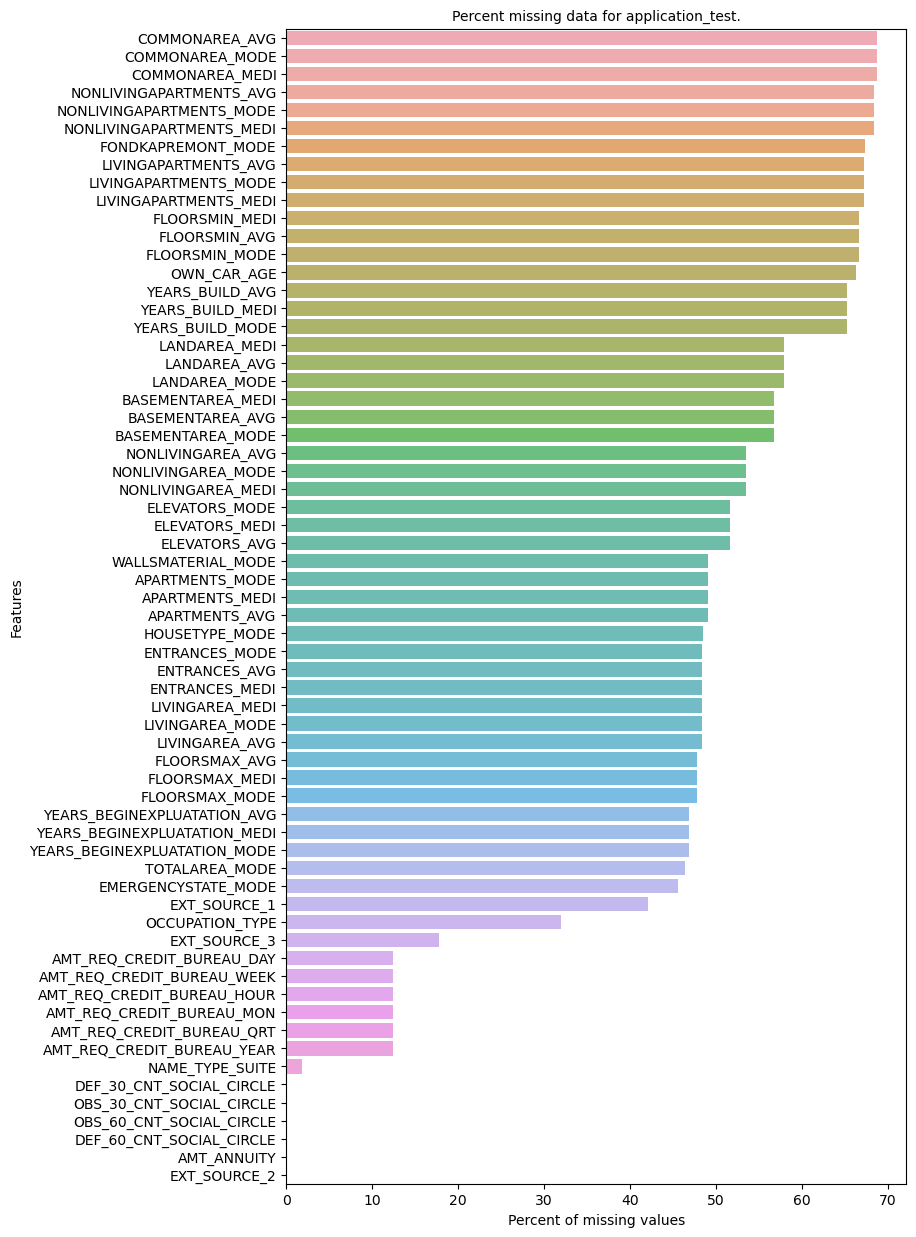

In [60]:
display_feature_info(datasets['application_test'], 'application_test')

# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


## agg detour

Aggregate using one or more operations over the specified axis.

For more details see [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
```python
DataFrame.agg(func, axis=0, *args, **kwargs**)
```
Aggregate using one or more operations over the specified axis.


In [61]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6         0.0               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
6                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
6                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
6                       NaN                    XNA             Canceled   

   DAYS_DECISION NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
6            -14               XNA                XAP             NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
6         Repeater                 XNA            XNA               XNA   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
6  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
6          NaN              XNA                Cash                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
6             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
6                        NaN

In [62]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704) & ~(appsDF["AMT_CREDIT"]==1.0)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6         0.0               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
6                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
6                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
6                       NaN                    XNA             Canceled   

   DAYS_DECISION NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
6            -14               XNA                XAP             NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
6         Repeater                 XNA            XNA               XNA   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
6  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
6          NaN              XNA                Cash                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
6             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
6                        NaN

## Missing values in prevApps

In [63]:
appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [64]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## feature engineering for prevApp table

In [65]:
# features = ['AMT_ANNUITY', 'AMT_APPLICATION']
# print(f"{appsDF[features].describe()}")
# agg_ops = ["min", "max", "mean"]
# result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg("mean") #group by ID
# display(result.head())
# print("-"*50)
# result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg({'AMT_ANNUITY' : agg_ops, 'AMT_APPLICATION' : agg_ops})
# result.columns = result.columns.map('_'.join)
# display(result)
# result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
# print(f"result.shape: {result.shape}")
# result[0:10]

In [66]:
# result.isna().sum()

## feature transformer for prevApp table

In [67]:
# # Create aggregate features (via pipeline)
# class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
#     def __init__(self, features=None): # no *args or **kargs
#         self.features = features
#         self.agg_op_features = ["min", "max", "mean"]

#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X, y=None):
#         #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
#         result = X.groupby(["SK_ID_CURR"], as_index=False).agg("mean") #group by ID
#         result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg({'AMT_ANNUITY' : self.agg_op_features, 'AMT_APPLICATION' : self.agg_op_features})
#         result.columns = result.columns.map('_'.join)
#         #display(result)
#         #result = result.reset_index(level=["SK_ID_CURR"])
#         result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
#         return result # return dataframe with the join key "SK_ID_CURR"
# #         result[0:10]

# from sklearn.pipeline import make_pipeline 
# def test_driver_prevAppsFeaturesAggregater(df, features):
#     print(f"df.shape: {df.shape}\n")
#     print(f"df[{features}][0:5]: \n{df[features][0:5]}")
#     test_pipeline = make_pipeline(prevAppsFeaturesAggregater(features))
#     return(test_pipeline.fit_transform(df))
         
# features = ['AMT_ANNUITY', 'AMT_APPLICATION']
# features = ['AMT_ANNUITY',
#        'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
#        'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
#        'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
#        'CNT_PAYMENT', 
#        'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
#        'DAYS_LAST_DUE', 'DAYS_TERMINATION']
# features = ['AMT_ANNUITY', 'AMT_APPLICATION']
# res = test_driver_prevAppsFeaturesAggregater(appsDF, features)
# print(f"HELLO")
# print(f"Test driver: \n{res[0:10]}")
# print(f"input[features][0:10]: \n{appsDF[0:10]}")


# # QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)



## Feature Engineering on Primary & Secondary Datasets
<a id='feat_eng'></a> 

Merge secondardy dataset with Primary dataset's (*application_train*) target variable to understand correlation between target variable and the secondary dataset's features.

In [68]:
def correlation_with_target(df):
    app_train = datasets["application_train"].copy()
    second_df = datasets[df].copy()
    corr_matrix = pd.concat([app_train.TARGET, second_df], axis=1).corr().filter(second_df.columns).filter(app_train.columns, axis=0)
    return corr_matrix

The following secondary datasets will be explored for correlation against the target variable.

In [69]:
for dataset in datasets.keys():
    print(dataset)

application_train
application_test
bureau
bureau_balance
credit_card_balance
installments_payments
previous_application
POS_CASH_balance


In [70]:
df_name = "bureau"
correlation_matrix = correlation_with_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau against the Target is :


DAYS_CREDIT_UPDATE        0.002159
DAYS_CREDIT_ENDDATE       0.002048
SK_ID_BUREAU              0.001550
DAYS_CREDIT               0.001443
AMT_CREDIT_SUM            0.000218
DAYS_ENDDATE_FACT         0.000203
AMT_ANNUITY               0.000189
AMT_CREDIT_MAX_OVERDUE   -0.000389
CNT_CREDIT_PROLONG       -0.000495
AMT_CREDIT_SUM_LIMIT     -0.000558
AMT_CREDIT_SUM_DEBT      -0.000946
SK_ID_CURR               -0.001070
AMT_CREDIT_SUM_OVERDUE   -0.001464
CREDIT_DAY_OVERDUE       -0.001815
Name: TARGET, dtype: float64

Important features from Phase 1: 'AMT_ANNUITY', 'AMT_CREDIT_SUM','DAYS_CREDIT','AMT_CREDIT_SUM_OVERDUE','CREDIT_DAY_OVERDUE'

Important features from Phase 2: 'AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_MAX_OVERDUE'

In [71]:
df_name = "bureau_balance"
correlation_matrix = correlation_with_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau_balance against the Target is :


SK_ID_BUREAU      0.001223
MONTHS_BALANCE   -0.005262
Name: TARGET, dtype: float64

In [72]:
df_name = "credit_card_balance"
correlation_matrix = correlation_with_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the credit_card_balance against the Target is :


CNT_DRAWINGS_ATM_CURRENT      0.001908
AMT_DRAWINGS_ATM_CURRENT      0.001520
AMT_INST_MIN_REGULARITY       0.001435
SK_ID_CURR                    0.001086
AMT_CREDIT_LIMIT_ACTUAL       0.000515
AMT_BALANCE                   0.000448
SK_ID_PREV                    0.000446
AMT_RECIVABLE                 0.000412
AMT_TOTAL_RECEIVABLE          0.000407
AMT_RECEIVABLE_PRINCIPAL      0.000383
SK_DPD                        0.000092
SK_DPD_DEF                   -0.000201
CNT_INSTALMENT_MATURE_CUM    -0.000342
MONTHS_BALANCE               -0.000768
AMT_PAYMENT_CURRENT          -0.001129
AMT_PAYMENT_TOTAL_CURRENT    -0.001395
AMT_DRAWINGS_CURRENT         -0.001419
CNT_DRAWINGS_CURRENT         -0.001764
CNT_DRAWINGS_OTHER_CURRENT   -0.001833
CNT_DRAWINGS_POS_CURRENT     -0.002387
AMT_DRAWINGS_OTHER_CURRENT   -0.002672
AMT_DRAWINGS_POS_CURRENT     -0.003518
Name: TARGET, dtype: float64

Important features from Phase 1: 'MONTHS_BALANCE', 'AMT_BALANCE', 'CNT_INSTALMENT_MATURE_CUM','AMT_DRAWINGS_ATM_CURRENT'
                   ,'AMT_INST_MIN_REGULARITY','AMT_PAYMENT_TOTAL_CURRENT'

Important features from Phase 2: 'CNT_DRAWINGS_ATM_CURRENT','AMT_CREDIT_LIMIT_ACTUAL','AMT_RECIVABLE',
'AMT_TOTAL_RECEIVABLE','AMT_RECEIVABLE_PRINCIPAL'

In [73]:
df_name = "installments_payments"
correlation_matrix = correlation_with_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the installments_payments against the Target is :


SK_ID_PREV                0.002891
NUM_INSTALMENT_VERSION    0.002511
NUM_INSTALMENT_NUMBER     0.000626
SK_ID_CURR               -0.000781
AMT_PAYMENT              -0.003512
DAYS_INSTALMENT          -0.003955
AMT_INSTALMENT           -0.003972
DAYS_ENTRY_PAYMENT       -0.004046
Name: TARGET, dtype: float64

Important features from Phase 1: 'AMT_INSTALMENT', 'AMT_PAYMENT'

Important features from Phase 2: 'DAYS_ENTRY_PAYMENT','DAYS_INSTALMENT','NUM_INSTALMENT_VERSION'

In [74]:
df_name = "previous_application"
correlation_matrix = correlation_with_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the previous_application against the Target is :


AMT_DOWN_PAYMENT             0.002496
CNT_PAYMENT                  0.002341
DAYS_LAST_DUE_1ST_VERSION    0.001908
AMT_CREDIT                   0.001833
AMT_APPLICATION              0.001689
AMT_GOODS_PRICE              0.001676
SK_ID_CURR                   0.001107
NFLAG_INSURED_ON_APPROVAL    0.000879
RATE_DOWN_PAYMENT            0.000850
RATE_INTEREST_PRIMARY        0.000542
SK_ID_PREV                   0.000362
DAYS_DECISION               -0.000482
AMT_ANNUITY                 -0.000492
DAYS_FIRST_DUE              -0.000943
SELLERPLACE_AREA            -0.000954
DAYS_TERMINATION            -0.001072
NFLAG_LAST_APPL_IN_DAY      -0.001256
DAYS_FIRST_DRAWING          -0.001293
DAYS_LAST_DUE               -0.001940
HOUR_APPR_PROCESS_START     -0.002285
RATE_INTEREST_PRIVILEGED    -0.026427
Name: TARGET, dtype: float64

Important features from Phase 1: 'AMT_ANNUITY', 'AMT_APPLICATION','AMT_DOWN_PAYMENT','CNT_PAYMENT','RATE_INTEREST_PRIVILEGED'

Important features from Phase 2: 'AMT_CREDIT','DAYS_FIRST_DRAWING','DAYS_LAST_DUE','HOUR_APPR_PROCESS_START','DAYS_FIRST_DUE'

In [75]:
df_name = "POS_CASH_balance"
correlation_matrix = correlation_with_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the POS_CASH_balance against the Target is :


CNT_INSTALMENT_FUTURE    0.002811
MONTHS_BALANCE           0.002775
SK_ID_PREV               0.002164
CNT_INSTALMENT           0.001434
SK_DPD                   0.000050
SK_ID_CURR              -0.000136
SK_DPD_DEF              -0.001362
Name: TARGET, dtype: float64

## Create Feature Aggregators
<a id='newfeature'></a> 

In [15]:
# Pipelines
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder


class FeaturesAggregator(BaseEstimator, TransformerMixin):
    def __init__(self, file_name=None, features=None, funcs=None, primary_key=None): # no *args or **kargs
        self.file_name = file_name
        self.features = features
        self.funcs = funcs
        self.primary_key = primary_key
        self.agg_op_features = {}
        for f in self.features:
            temp = {f"{file_name}_{f}_{func}":func for func in self.funcs}
            self.agg_op_features[f]=[(k, v) for k, v in temp.items()]
        print(self.agg_op_features)
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby([self.primary_key]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=[self.primary_key])
        return result 

In [16]:
agg_funcs = ['min', 'max', 'mean']

# prevApps = datasets['previous_application']
prevApps_features = ['AMT_ANNUITY', 'AMT_APPLICATION','AMT_DOWN_PAYMENT','CNT_PAYMENT','RATE_INTEREST_PRIVILEGED'   # Phase 1
                     ,'AMT_CREDIT','DAYS_FIRST_DRAWING','DAYS_LAST_DUE','DAYS_FIRST_DUE'  # Phase 2
                    ]

# bureau = datasets['bureau']
bureau_features = ['AMT_ANNUITY', 'AMT_CREDIT_SUM','DAYS_CREDIT','AMT_CREDIT_SUM_OVERDUE','CREDIT_DAY_OVERDUE' # Phase 1
                   ,'AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_MAX_OVERDUE' # Phase 2
                  ]
# bureau_funcs = ['min', 'max', 'mean', 'count', 'sum']

# bureau_bal = datasets['bureau_balance']
bureau_bal_features = ['MONTHS_BALANCE'] # Phase 1

# cc_bal = datasets['credit_card_balance']
cc_bal_features = ['MONTHS_BALANCE', 'AMT_BALANCE', 'CNT_INSTALMENT_MATURE_CUM','AMT_DRAWINGS_ATM_CURRENT'
                   ,'AMT_INST_MIN_REGULARITY','AMT_PAYMENT_TOTAL_CURRENT'   # Phase 1
                   ,'CNT_DRAWINGS_ATM_CURRENT','AMT_CREDIT_LIMIT_ACTUAL','AMT_RECIVABLE'
                   ,'AMT_TOTAL_RECEIVABLE','AMT_RECEIVABLE_PRINCIPAL' # Phase 2
                  ]

# installments_pmnts = datasets['installments_payments']
installments_pmnts_features = ['AMT_INSTALMENT', 'AMT_PAYMENT' # Phase 1
                               ,'DAYS_ENTRY_PAYMENT','DAYS_INSTALMENT','NUM_INSTALMENT_VERSION' # Phase 2
                              ]

pos_cash_balance_features = ['CNT_INSTALMENT_FUTURE','MONTHS_BALANCE','SK_DPD_DEF'] # Phase 1


## Engineer New Features

Engineer new features capturing relationship between income and credit amount as well as annuity and income for Application dataset

In [17]:
class engineer_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None):
        self
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):

        # FROM APPLICATION
        # Added in Phase 1
        # Income Credit Percentage
        X['ef_INCOME_CREDIT_PERCENT'] = (X.AMT_INCOME_TOTAL / X.AMT_CREDIT).replace(np.inf, 0)
    
        # Annuity as Percentage of Annual Income
        X['ef_ANN_INCOME_PERCENT'] = (X.AMT_ANNUITY / X.AMT_INCOME_TOTAL).replace(np.inf, 0)     
        
        # Added in Phase 2
        # Goods Price as Percentage of Annual Income
        X['ef_GOODS_PRICE_PERCENT'] = (X.AMT_GOODS_PRICE / X.AMT_INCOME_TOTAL).replace(np.inf, 0)
        
        # Count of non children family members
        X['ef_CNT_NON_CHILDREN'] = X.CNT_FAM_MEMBERS - X.CNT_CHILDREN
        
        # Living to Land Area Ratio
        X['ef_LIVINGAREA_LANDAREA_AVG_RATIO'] = (X.LIVINGAREA_AVG / X.LANDAREA_AVG).replace(np.inf, 0)

        return X

Engineer new features capturing range of annuity, application, and downpayment amounts from the Previous Application dataset

In [18]:
class prevApp_engineer_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None):
        self
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):

        # FROM PREVIOUS APPLICATION
        # Added in Phase 1
        # Add Annuity, Application, and Downpaymet ranges
        X['ef_prevApps_AMT_ANNUITY_range'] = (X.prevApps_AMT_ANNUITY_max - X.prevApps_AMT_ANNUITY_min).replace(np.inf, 0)
        X['ef_prevApps_AMT_APPLICATION_range'] = (X.prevApps_AMT_APPLICATION_max - X.prevApps_AMT_APPLICATION_min).replace(np.inf, 0)
        X['ef_prevApps_AMT_DOWN_PAYMENT_range'] = (X.prevApps_AMT_DOWN_PAYMENT_max - X.prevApps_AMT_DOWN_PAYMENT_min).replace(np.inf, 0)

        return X

Engineer new features capturing range of annuity, application, and downpayment amounts from the Bureau dataset.

In [19]:
class bureau_engineer_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None):
        self
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):

        # FROM BUREAU DATASET
        # Added in Phase 2
        # Add Debt to Credit Limit Ratio, Overdue amount to Credit Ratio
        bureau_AMT_CREDIT_SUM_DEBT_mean_nan = np.mean(X.bureau_AMT_CREDIT_SUM_DEBT_mean)
        bureau_AMT_CREDIT_SUM_OVERDUE_mean_nan = np.mean(X.bureau_AMT_CREDIT_SUM_OVERDUE_mean)
        bureau_AMT_CREDIT_SUM_LIMIT_mean_nan = np.mean(X.bureau_AMT_CREDIT_SUM_LIMIT_mean)
        
        X['ef_bureau_AMT_DEBT_CREDIT_RATIO'] = ( (X.bureau_AMT_CREDIT_SUM_DEBT_mean).fillna(bureau_AMT_CREDIT_SUM_DEBT_mean_nan) / (X.bureau_AMT_CREDIT_SUM_LIMIT_mean).fillna(bureau_AMT_CREDIT_SUM_LIMIT_mean_nan) ).replace(np.inf, 0) # fill with mean or median instead of 0
        X['ef_bureau_AMT_OVERDUE_CREDIT_RATIO'] = ( (X.bureau_AMT_CREDIT_SUM_OVERDUE_mean).fillna(bureau_AMT_CREDIT_SUM_OVERDUE_mean_nan) / (X.bureau_AMT_CREDIT_SUM_LIMIT_mean).fillna(bureau_AMT_CREDIT_SUM_LIMIT_mean_nan) ).replace(np.inf, 0) # fill with mean or median instead of 0
        
        # Add Credit, Debt & Overdue ranges
        X['ef_bureau_AMT_CREDIT_SUM_range'] = (X.bureau_AMT_CREDIT_SUM_max - X.bureau_AMT_CREDIT_SUM_min).replace(np.inf, 0)
        X['ef_bureau_AMT_CREDIT_SUM_DEBT_range'] = (X.bureau_AMT_CREDIT_SUM_DEBT_max - X.bureau_AMT_CREDIT_SUM_DEBT_min).replace(np.inf, 0)
        X['ef_bureau_AMT_CREDIT_SUM_OVERDUE_range'] = (X.bureau_AMT_CREDIT_SUM_OVERDUE_max - X.bureau_AMT_CREDIT_SUM_OVERDUE_min).replace(np.inf, 0)

        return X

## Build Pipeline for each Dataset

In [20]:
from sklearn.pipeline import make_pipeline, Pipeline

primary_key="SK_ID_CURR"
primary_key1= "SK_ID_BUREAU"

# Feature engineering pipeline for application_train:
appln_new_features_pipeline = Pipeline([
    ('engineer_features', engineer_features()),  # add some new features
    ])

# Feature Engineering for all secondary Datasets:
prevApps_features_pipeline = Pipeline([
#        ('prevApps_add_features1', prevApps_add_features1()),  # add some new features 
#        ('prevApps_add_features2', prevApps_add_features2()),  # add some new features
    ('prevApps_aggregator', FeaturesAggregator('prevApps', prevApps_features, agg_funcs,primary_key)), # Aggregate across old and new features
    ('prevApp_engineer_features', prevApp_engineer_features())
    ])

bureau_features_pipeline = Pipeline([
    ('bureau_aggregator', FeaturesAggregator('bureau', bureau_features, agg_funcs,primary_key)), # Aggregate across old and new features
    ('bureau_engineer_features', bureau_engineer_features())
    ])

bureau_bal_features_pipeline = Pipeline([
    ('bureau_bal_aggregator', FeaturesAggregator('bureau_balance', bureau_bal_features , agg_funcs,primary_key1)), # Aggregate across old and new features
    ])

cc_bal_features_pipeline = Pipeline([
    ('cc_bal_aggregator', FeaturesAggregator('credit_card_balance', cc_bal_features , agg_funcs,primary_key)), # Aggregate across old and new features
    ])

installments_pmnts_features_pipeline = Pipeline([
    ('installments_pmnts_features_aggregator', FeaturesAggregator('installments_pmnts', installments_pmnts_features , agg_funcs,primary_key)), # Aggregate across old and new features
    ])

pos_cash_balance_features_pipeline = Pipeline([
    ('pos_cash_balance_features_aggregator', FeaturesAggregator('pos_cash_balance', pos_cash_balance_features , agg_funcs,primary_key)), # Aggregate across old and new features
    ])

{'AMT_ANNUITY': [('prevApps_AMT_ANNUITY_min', 'min'), ('prevApps_AMT_ANNUITY_max', 'max'), ('prevApps_AMT_ANNUITY_mean', 'mean')], 'AMT_APPLICATION': [('prevApps_AMT_APPLICATION_min', 'min'), ('prevApps_AMT_APPLICATION_max', 'max'), ('prevApps_AMT_APPLICATION_mean', 'mean')], 'AMT_DOWN_PAYMENT': [('prevApps_AMT_DOWN_PAYMENT_min', 'min'), ('prevApps_AMT_DOWN_PAYMENT_max', 'max'), ('prevApps_AMT_DOWN_PAYMENT_mean', 'mean')], 'CNT_PAYMENT': [('prevApps_CNT_PAYMENT_min', 'min'), ('prevApps_CNT_PAYMENT_max', 'max'), ('prevApps_CNT_PAYMENT_mean', 'mean')], 'RATE_INTEREST_PRIVILEGED': [('prevApps_RATE_INTEREST_PRIVILEGED_min', 'min'), ('prevApps_RATE_INTEREST_PRIVILEGED_max', 'max'), ('prevApps_RATE_INTEREST_PRIVILEGED_mean', 'mean')], 'AMT_CREDIT': [('prevApps_AMT_CREDIT_min', 'min'), ('prevApps_AMT_CREDIT_max', 'max'), ('prevApps_AMT_CREDIT_mean', 'mean')], 'DAYS_FIRST_DRAWING': [('prevApps_DAYS_FIRST_DRAWING_min', 'min'), ('prevApps_DAYS_FIRST_DRAWING_max', 'max'), ('prevApps_DAYS_FIRST_DR

## Prepare Datasets

In [21]:
# Primary Application Training Dataset
appsTrainDF_agg = datasets['application_train']

# Secondary Datasets
prevApps_agg = datasets["previous_application"] #prev app
bureau_agg = datasets["bureau"] #bureau app
bureaubal_agg = datasets['bureau_balance']
ccblance_agg = datasets["credit_card_balance"] #prev app
installmentspayments_agg = datasets["installments_payments"] #bureau app
posbal_agg = datasets['POS_CASH_balance']

Create Aggregate datasets after performing fit & transform

In [22]:
appsTrainDF_agg = appln_new_features_pipeline.fit_transform(appsTrainDF_agg)

prevApps_agg = prevApps_features_pipeline.fit_transform(prevApps_agg)
# prevApps_agg = prevApp_new_features_pipeline.fit_transform(prevApps_agg)
bureaubal_agg = bureau_bal_features_pipeline.fit_transform(bureaubal_agg) 
ccblance_agg = cc_bal_features_pipeline.fit_transform(ccblance_agg)
installmentspayments_agg = installments_pmnts_features_pipeline.fit_transform(installmentspayments_agg)
posbal_agg = pos_cash_balance_features_pipeline.fit_transform(posbal_agg)

In [23]:
bureau_agg = bureau_agg.merge(bureaubal_agg, how='left', on='SK_ID_BUREAU')
bureau_agg = bureau_features_pipeline.fit_transform(bureau_agg)

In [24]:
bureau_agg.head()

SK_ID_CURR  bureau_AMT_ANNUITY_min  bureau_AMT_ANNUITY_max  \
0      100001                     0.0                 10822.5   
1      100002                     0.0                     0.0   
2      100003                     NaN                     NaN   
3      100004                     NaN                     NaN   
4      100005                     0.0                  4261.5   

   bureau_AMT_ANNUITY_mean  bureau_AMT_CREDIT_SUM_min  \
0              3545.357143                    85500.0   
1                 0.000000                        0.0   
2                      NaN                    22248.0   
3                      NaN                    94500.0   
4              1420.500000                    29826.0   

   bureau_AMT_CREDIT_SUM_max  bureau_AMT_CREDIT_SUM_mean  \
0                   378000.0               207623.571429   
1                   450000.0               108131.945625   
2                   810000.0               254350.125000   
3                    94537.8                94518.900000   
4                   568800.0               219042.000000   

   bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_mean  \
0                   -1572                     -49              -735.000000   
1                   -1437                    -103              -874.000000   
2                   -2586                    -606             -1400.750000   
3                   -1326                    -408              -867.000000   
4                    -373                     -62              -190.666667   

   ...  bureau_AMT_CREDIT_SUM_LIMIT_max  bureau_AMT_CREDIT_SUM_LIMIT_mean  \
0  ...                            0.000                           0.00000   
1  ...                        31988.565                        7997.14125   
2  ...                       810000.000                      202500.00000   
3  ...                            0.000                           0.00000   
4  ...                            0.000                           0.00000   

   bureau_AMT_CREDIT_MAX_OVERDUE_min  bureau_AMT_CREDIT_MAX_OVERDUE_max  \
0                                NaN                                NaN   
1                                0.0                           5043.645   
2                                0.0                              0.000   
3                                0.0                              0.000   
4                                0.0                              0.000   

   bureau_AMT_CREDIT_MAX_OVERDUE_mean  ef_bureau_AMT_DEBT_CREDIT_RATIO  \
0                                 NaN                         0.000000   
1                            1681.029                         6.146721   
2                               0.000                         0.000000   
3                               0.000                              NaN   
4                               0.000                         0.000000   

   ef_bureau_AMT_OVERDUE_CREDIT_RATIO  ef_bureau_AMT_CREDIT_SUM_range  \
0                                 NaN                        292500.0   
1                                 0.0                        450000.0   
2                                 0.0                        787752.0   
3                                 NaN                            37.8   
4                                 NaN                        538974.0   

   ef_bureau_AMT_CREDIT_SUM_DEBT_range  ef_bureau_AMT_CREDIT_SUM_OVERDUE_range  
0                             373239.0                                     0.0  
1                             245781.0                                     0.0  
2                                  0.0                                     0.0  
3                                  0.0                                     0.0  
4                             543087.0                                     0.0  

[5 rows x 30 columns]

In [25]:
prevApps_agg.head()

SK_ID_CURR  prevApps_AMT_ANNUITY_min  prevApps_AMT_ANNUITY_max  \
0      100001                  3951.000                  3951.000   
1      100002                  9251.775                  9251.775   
2      100003                  6737.310                 98356.995   
3      100004                  5357.250                  5357.250   
4      100005                  4813.200                  4813.200   

   prevApps_AMT_ANNUITY_mean  prevApps_AMT_APPLICATION_min  \
0                   3951.000                       24835.5   
1                   9251.775                      179055.0   
2                  56553.990                       68809.5   
3                   5357.250                       24282.0   
4                   4813.200                           0.0   

   prevApps_AMT_APPLICATION_max  prevApps_AMT_APPLICATION_mean  \
0                       24835.5                       24835.50   
1                      179055.0                      179055.00   
2                      900000.0                      435436.50   
3                       24282.0                       24282.00   
4                       44617.5                       22308.75   

   prevApps_AMT_DOWN_PAYMENT_min  prevApps_AMT_DOWN_PAYMENT_max  \
0                         2520.0                         2520.0   
1                            0.0                            0.0   
2                            0.0                         6885.0   
3                         4860.0                         4860.0   
4                         4464.0                         4464.0   

   prevApps_AMT_DOWN_PAYMENT_mean  ...  prevApps_DAYS_FIRST_DRAWING_mean  \
0                          2520.0  ...                          365243.0   
1                             0.0  ...                          365243.0   
2                          3442.5  ...                          365243.0   
3                          4860.0  ...                          365243.0   
4                          4464.0  ...                          365243.0   

   prevApps_DAYS_LAST_DUE_min  prevApps_DAYS_LAST_DUE_max  \
0                     -1619.0                     -1619.0   
1                       -25.0                       -25.0   
2                     -1980.0                      -536.0   
3                      -724.0                      -724.0   
4                      -466.0                      -466.0   

   prevApps_DAYS_LAST_DUE_mean  prevApps_DAYS_FIRST_DUE_min  \
0                 -1619.000000                      -1709.0   
1                   -25.000000                       -565.0   
2                 -1054.333333                      -2310.0   
3                  -724.000000                       -784.0   
4                  -466.000000                       -706.0   

   prevApps_DAYS_FIRST_DUE_max  prevApps_DAYS_FIRST_DUE_mean  \
0                      -1709.0                  -1709.000000   
1                       -565.0                   -565.000000   
2                       -716.0                  -1274.333333   
3                       -784.0                   -784.000000   
4                       -706.0                   -706.000000   

   ef_prevApps_AMT_ANNUITY_range  ef_prevApps_AMT_APPLICATION_range  \
0                          0.000                                0.0   
1                          0.000                                0.0   
2                      91619.685                           831190.5   
3                          0.000                                0.0   
4                          0.000                            44617.5   

   ef_prevApps_AMT_DOWN_PAYMENT_range  
0                                 0.0  
1                                 0.0  
2                              6885.0  
3                                 0.0  
4                                 0.0  

[5 rows x 31 columns]

## Join the labeled dataset

In [26]:
~3==3

False

In [27]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

Perform data merging of primary application and secondary datasets.

In [28]:
merge_all_data = True


# if merge_all_data:
#     prevApps_aggregated = prevApps_feature_pipeline.transform(appsDF)
    
# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
    appsTrainDF_agg = appsTrainDF_agg.merge(prevApps_agg, how='left', on='SK_ID_CURR')
    appsTrainDF_agg = appsTrainDF_agg.merge(bureau_agg, how='left', on="SK_ID_CURR")
    appsTrainDF_agg = appsTrainDF_agg.merge(ccblance_agg, how='left', on="SK_ID_CURR")
    appsTrainDF_agg = appsTrainDF_agg.merge(installmentspayments_agg, how='left', on="SK_ID_CURR")
    appsTrainDF_agg = appsTrainDF_agg.merge(posbal_agg, how='left', on="SK_ID_CURR")
    #appsTrainDF_agg = appsTrainDF_agg.merge(bureaubal_agg, how='left', on="SK_ID_BUREAU")

In [29]:
appsTrainDF_agg.shape

(307511, 243)

Check presence of newly engineered features

In [30]:
appsTrainDF_agg[['ef_INCOME_CREDIT_PERCENT', 'ef_ANN_INCOME_PERCENT','ef_prevApps_AMT_ANNUITY_range'
                 , 'ef_prevApps_AMT_APPLICATION_range', 'ef_prevApps_AMT_DOWN_PAYMENT_range'
                 , 'ef_prevApps_AMT_ANNUITY_range', 'ef_prevApps_AMT_APPLICATION_range'
                 , 'ef_prevApps_AMT_DOWN_PAYMENT_range']].head()

ef_INCOME_CREDIT_PERCENT  ef_ANN_INCOME_PERCENT  \
0                  0.498036               0.121978   
1                  0.208736               0.132217   
2                  0.500000               0.100000   
3                  0.431748               0.219900   
4                  0.236842               0.179963   

   ef_prevApps_AMT_ANNUITY_range  ef_prevApps_AMT_APPLICATION_range  \
0                          0.000                                0.0   
1                      91619.685                           831190.5   
2                          0.000                                0.0   
3                      37471.590                           688500.0   
4                      20844.495                           230323.5   

   ef_prevApps_AMT_DOWN_PAYMENT_range  ef_prevApps_AMT_ANNUITY_range  \
0                                0.00                          0.000   
1                             6885.00                      91619.685   
2                                0.00                          0.000   
3                            64293.66                      37471.590   
4                              571.50                      20844.495   

   ef_prevApps_AMT_APPLICATION_range  ef_prevApps_AMT_DOWN_PAYMENT_range  
0                                0.0                                0.00  
1                           831190.5                             6885.00  
2                                0.0                                0.00  
3                           688500.0                            64293.66  
4                           230323.5                              571.50

## Join the unlabeled dataset (i.e., the submission file)

Perform data merging of primary application and secondary datasets.

In [31]:
X_kaggle_test = datasets["application_test"]
X_kaggle_test = appln_new_features_pipeline.fit_transform(X_kaggle_test)

merge_all_data = True
if merge_all_data:
    X_kaggle_test = X_kaggle_test.merge(prevApps_agg, how='left', on='SK_ID_CURR')
    X_kaggle_test = X_kaggle_test.merge(bureau_agg, how='left', on="SK_ID_CURR")
    X_kaggle_test = X_kaggle_test.merge(ccblance_agg, how='left', on="SK_ID_CURR")
    X_kaggle_test = X_kaggle_test.merge(installmentspayments_agg, how='left', on="SK_ID_CURR")
    X_kaggle_test = X_kaggle_test.merge(posbal_agg, how='left', on="SK_ID_CURR")
    

In [32]:
print(X_kaggle_test.shape)

X_kaggle_test.head(3)

(48744, 242)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   

   ... installments_pmnts_NUM_INSTALMENT_VERSION_mean  \
0  ...                                       1.142857   
1  ...                                       1.111111   
2  ...                                       0.277419   

  pos_cash_balance_CNT_INSTALMENT_FUTURE_min  \
0                                        0.0   
1                                        0.0   
2                                        0.0   

  pos_cash_balance_CNT_INSTALMENT_FUTURE_max  \
0                                        4.0   
1                                       12.0   
2                                       36.0   

  pos_cash_balance_CNT_INSTALMENT_FUTURE_mean  \
0                                    1.444444   
1                                    7.200000   
2                                   15.305556   

  pos_cash_balance_MONTHS_BALANCE_min  pos_cash_balance_MONTHS_BALANCE_max  \
0                               -96.0                                -53.0   
1                               -25.0                                -15.0   
2                               -66.0                                 -3.0   

   pos_cash_balance_MONTHS_BALANCE_mean  pos_cash_balance_SK_DPD_DEF_min  \
0                            -72.555556                              0.0   
1                            -20.000000                              0.0   
2                            -29.555556                              0.0   

   pos_cash_balance_SK_DPD_DEF_max  pos_cash_balance_SK_DPD_DEF_mean  
0                              7.0                          0.777778  
1                              0.0                          0.000000  
2                              0.0                          0.000000  

[3 rows x 242 columns]

In [33]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X
    
    


# Processing pipeline

###  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):

 

Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.

 

Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```


Please [this  blog](https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d) for more details of OHE when the validation/test have previously unseen unique values.

## HCDR preprocessing

In [34]:
#train_dataset = datasets["application_train"]
train_dataset = appsTrainDF_agg
class_labels = ["No Default","Default"]

### Dataframe Column Selector

In [35]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

### Numerical Pipeline Set-up

In [36]:
# Identify the numeric features we wish to consider. 
num_attribs = [
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'EXT_SOURCE_3',
'EXT_SOURCE_2',
'EXT_SOURCE_1',
'DAYS_EMPLOYED',
'DAYS_BIRTH',
'FLOORSMAX_AVG',
'FLOORSMAX_MEDI',
'FLOORSMAX_MODE',
'AMT_GOODS_PRICE',
'REGION_POPULATION_RELATIVE',
'REG_CITY_NOT_LIVE_CITY',
'FLAG_EMP_PHONE',
'REG_CITY_NOT_WORK_CITY',
'DAYS_ID_PUBLISH',
'DAYS_LAST_PHONE_CHANGE',
'REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY',
'OWN_CAR_AGE',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'ef_INCOME_CREDIT_PERCENT',
'ef_ANN_INCOME_PERCENT',
'ef_GOODS_PRICE_PERCENT',
'ef_CNT_NON_CHILDREN',
'ef_LIVINGAREA_LANDAREA_AVG_RATIO',
## Highly correlated previous applications
'prevApps_AMT_ANNUITY_mean',
'prevApps_AMT_DOWN_PAYMENT_min',
'prevApps_AMT_DOWN_PAYMENT_mean',
'prevApps_CNT_PAYMENT_max',
'prevApps_RATE_INTEREST_PRIVILEGED_mean',
'prevApps_AMT_CREDIT_mean',
'prevApps_AMT_CREDIT_min',
'prevApps_AMT_CREDIT_max',
'prevApps_DAYS_FIRST_DRAWING_mean',
'prevApps_DAYS_LAST_DUE_mean',
'prevApps_DAYS_FIRST_DUE_mean',
'ef_prevApps_AMT_ANNUITY_range', 
'ef_prevApps_AMT_APPLICATION_range',
'ef_prevApps_AMT_DOWN_PAYMENT_range',
## Highly correlated Bureau features
'bureau_AMT_ANNUITY_mean', 
'bureau_AMT_CREDIT_SUM_mean',
'bureau_DAYS_CREDIT_mean',
'bureau_DAYS_CREDIT_max',
'bureau_AMT_CREDIT_SUM_DEBT_mean',
'bureau_AMT_CREDIT_SUM_LIMIT_mean',
'bureau_AMT_CREDIT_MAX_OVERDUE_mean',
'ef_bureau_AMT_CREDIT_SUM_range',
'ef_bureau_AMT_CREDIT_SUM_DEBT_range',
'ef_bureau_AMT_CREDIT_SUM_OVERDUE_range',
## Highly correlated Installment Payment features
'installments_pmnts_AMT_INSTALMENT_min',
'installments_pmnts_AMT_INSTALMENT_max',
'installments_pmnts_AMT_INSTALMENT_mean',
'installments_pmnts_AMT_PAYMENT_mean',
'installments_pmnts_DAYS_ENTRY_PAYMENT_min',
'installments_pmnts_DAYS_ENTRY_PAYMENT_max',
'installments_pmnts_DAYS_ENTRY_PAYMENT_mean',
'installments_pmnts_DAYS_INSTALMENT_min',
'installments_pmnts_DAYS_INSTALMENT_max',
'installments_pmnts_DAYS_INSTALMENT_mean',
'installments_pmnts_NUM_INSTALMENT_VERSION_mean',
## Highly correlated Credit card balance features
'credit_card_balance_MONTHS_BALANCE_min',
'credit_card_balance_MONTHS_BALANCE_max',
'credit_card_balance_MONTHS_BALANCE_mean',
'credit_card_balance_AMT_BALANCE_min',
'credit_card_balance_AMT_BALANCE_max',
'credit_card_balance_AMT_BALANCE_mean',
'credit_card_balance_AMT_DRAWINGS_ATM_CURRENT_mean',
'credit_card_balance_AMT_INST_MIN_REGULARITY_mean',
'credit_card_balance_AMT_PAYMENT_TOTAL_CURRENT_mean',
'credit_card_balance_CNT_DRAWINGS_ATM_CURRENT_min',
'credit_card_balance_CNT_DRAWINGS_ATM_CURRENT_max',
'credit_card_balance_CNT_DRAWINGS_ATM_CURRENT_mean',
'credit_card_balance_AMT_CREDIT_LIMIT_ACTUAL_max',
'credit_card_balance_AMT_RECIVABLE_mean',
'credit_card_balance_AMT_TOTAL_RECEIVABLE_mean',
'credit_card_balance_AMT_RECEIVABLE_PRINCIPAL_min',
'credit_card_balance_AMT_RECEIVABLE_PRINCIPAL_max',
'credit_card_balance_AMT_RECEIVABLE_PRINCIPAL_mean',
## Highly correlated POS balance features
'pos_cash_balance_CNT_INSTALMENT_FUTURE_min',
'pos_cash_balance_CNT_INSTALMENT_FUTURE_max',
'pos_cash_balance_CNT_INSTALMENT_FUTURE_mean',
'pos_cash_balance_MONTHS_BALANCE_mean'
]


In [37]:
print('Number of numerical features: ', len(num_attribs))

Number of numerical features:  84


In [38]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
    ])

### Categorical Attributes

In [39]:
# Identify the categorical features we wish to consider.
# cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
#                'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

In [40]:
print('Number of numerical features: ', len(cat_attribs))

Number of numerical features:  7


In [41]:
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

### Create Consolidated Data Pipeline

Use ColumnTransformer instead of FeatureUnion

In [42]:
from sklearn.compose import ColumnTransformer

# data_prep_pipeline = FeatureUnion(transformer_list=[
#         ("num_pipeline", num_pipeline),
#         ("cat_pipeline", cat_pipeline),
#     ])  

data_prep_pipeline = ColumnTransformer(transformers=[       
      #( name, transformer,     columns)
       ("num_pipeline", num_pipeline, num_attribs),
       ("cat_pipeline", cat_pipeline, cat_attribs),
    ],
        n_jobs=-1
   )

### Summarize Features Considered and Lengths

In [43]:
# print('Numerical Feature Family: ', num_attribs)
print('Numerical Feature Count:  ', len(num_attribs))
print('--------------------------')
# print('Categorical Feature Family: ', cat_attribs)
print('Categorical Feature Count:  ', len(cat_attribs))
print('--------------------------')
print('Total Number of Input Features: ', len(num_attribs) + len(cat_attribs))

Numerical Feature Count:   84
--------------------------
Categorical Feature Count:   7
--------------------------
Total Number of Input Features:  91


In [44]:
selected_features = num_attribs + cat_attribs
len(selected_features)

91

### Feature Engineering

In [109]:
# from sklearn.base import BaseEstimator, TransformerMixin
# import re

# # Creates the following date features
# # But could do so much more with these features
# #    E.g., 
# #      extract the domain address of the homepage and OneHotEncode it
# # 
# # ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
# class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
#     def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
#         self.features = features
#     def fit(self, X, y=None):
#         return self  # nothing else to do
#     def transform(self, X):
#         df = pd.DataFrame(X, columns=self.features)
#         #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
# #         df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
#         #df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(map(lambda x: 1. if x.lower() in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.))   
#         df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in list(map(lambda x: x.lower(), ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'])) else 0.)   
#         #df.drop(self.features, axis=1, inplace=True)
#         return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

# from sklearn.pipeline import make_pipeline 
# features = ["OCCUPATION_TYPE"]
# def test_driver_prep_OCCUPATION_TYPE():
#     print(f"X_train.shape: {X_train.shape}\n")
#     print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
#     test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
#     return(test_pipeline.fit_transform(X_train))
          
# x = test_driver_prep_OCCUPATION_TYPE()
# print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
# print(f"X_train['name'][0:10]: \n{X_train[features][0:10]}")


# # QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


In [45]:
list(datasets["application_train"].columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

# Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [46]:
def pct(x):
    return round(100*x,3)

In [137]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Train Precision",
                                   "Valid Precision",
                                   "Test Precision",
                                   "Train Recall",
                                   "Valid Recall",
                                   "Test Recall",
                                   "Train Log Loss",
                                   "Valid Log Loss",
                                   "Test Log Loss",
                                   "P Score",
                                   "Train RMSE", 
                                   "Valid RMSE",
                                   "Test  RMSE",
                                   "Train MAE", 
                                   "Valid MAE",
                                   "Test  MAE",
                                   "Train Time",
                                   "Valid Time",
                                   "Test Time",
                                   "Description"
                                  ])


## Split Application into Train-Test split

In [59]:
appsTrainDF_agg.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [48]:
train_dataset = appsTrainDF_agg

In [129]:
train_dataset.shape

(307511, 243)

In [130]:
# Split Sample to feed the pipeline and it will result in a new dataset that is (1 / splits) the size 
splits = 3

# Train Test split percentage
subsample_rate = 0.3

finaldf = np.array_split(train_dataset, splits)
X_train = finaldf[0][selected_features]
y_train = finaldf[0]['TARGET']
X_kaggle_test= X_kaggle_test[selected_features]

## split part of data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train,
                                                    test_size=subsample_rate, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,test_size=0.15, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (60989, 91)
X validation      shape: (10763, 91)
X test            shape: (30752, 91)
X X_kaggle_test   shape: (48744, 91)


## Define Pipeline

In [131]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("logistic", LogisticRegression())
    ])

CPU times: user 6.45 ms, sys: 171 µs, total: 6.62 ms
Wall time: 5.58 ms


## Perform cross-fold validation and Train the model
Split the training data to 10 fold to perform Crossfold validation

In [132]:
# Import Model selection libraries
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

In [133]:
# Use ShuffleSplit() with 5 splits, 30% test_size and random state of 0
cvSplits = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

In [134]:
from time import time, ctime
from sklearn.metrics import log_loss, make_scorer

start = time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
np.random.seed(42)

# Set up cross validation scores 
logit_scores = cross_validate(model, X_train, y_train, cv=cvSplits, scoring=make_scorer(log_loss), return_train_score=True, n_jobs=-1)               
train_time = np.round(time() - start, 4)

# Time and score valid predictions
start = time()
logit_score_valid  = full_pipeline_with_predictor.score(X_valid, y_valid)
valid_time = np.round(time() - start, 4)

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time() - start, 4)

In [135]:
logit_scores

{'fit_time': array([2.7547009 , 2.59689641, 2.81942034, 2.9246428 , 2.82481122]),
 'score_time': array([0.22927523, 0.1289053 , 0.12815261, 0.13114214, 0.23704362]),
 'test_score': array([2.87492912, 2.80508556, 2.80886073, 2.7503427 , 2.85416514]),
 'train_score': array([2.7692843 , 2.80326314, 2.79679103, 2.82429781, 2.78465577])}

## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from scipy import stats

In [138]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [139]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

y_train_pred_prob = model.predict_proba(X_train)[:, 1]
y_valid_pred_prob = model.predict_proba(X_valid)[:, 1]
y_test_pred_prob = model.predict_proba(X_test)[:, 1]

exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, y_train_pred), 
                accuracy_score(y_valid, y_valid_pred),
                accuracy_score(y_test, y_test_pred),
                roc_auc_score(y_train, y_train_pred_prob),
                roc_auc_score(y_valid, y_valid_pred_prob),
                roc_auc_score(y_test, y_test_pred_prob),
                precision_score(y_train, y_train_pred), 
                precision_score(y_valid, y_valid_pred),
                precision_score(y_test, y_test_pred),
                recall_score(y_train, y_train_pred), 
                recall_score(y_valid, y_valid_pred),
                recall_score(y_test, y_test_pred),
                logit_scores['train_score'].mean(),
                logit_scores['test_score'].mean(),
                log_loss(y_test, model.predict(X_test)),
                0,   # p-value not relevant for Baseline model
                np.round(np.sqrt(mean_squared_error(y_train, y_train_pred_prob)), 3),
                np.round(np.sqrt(mean_squared_error(y_valid, y_valid_pred_prob)), 3),
                np.round(np.sqrt(mean_squared_error(y_test, y_test_pred_prob)), 3),
                np.round(mean_absolute_error(y_train, y_train_pred_prob), 3),
                np.round(mean_absolute_error(y_valid, y_valid_pred_prob), 3),
                np.round(mean_absolute_error(y_test, y_test_pred_prob), 3)], 4)) \
                + [train_time, valid_time, test_time] + [f"Baseline LR {len(selected_features)}"]
    
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_91_features     0.9188     0.9191     0.9182     0.7615   

   Valid AUC  Test  AUC  Train Precision  Valid Precision  Test Precision  \
0     0.7504     0.7567           0.4976             0.56          0.3895   

   Train Recall  Valid Recall  Test Recall  Train Log Loss  Valid Log Loss  \
0        0.0206         0.016       0.0148          2.7957          2.8187   

   Test Log Loss  P Score  Train RMSE  Valid RMSE  Test  RMSE  Train MAE  \
0         2.8269      0.0       0.261       0.261       0.262      0.136   

   Valid MAE  Test  MAE  Train Time  Valid Time  Test Time     Description  
0      0.137      0.136      8.4338      0.2404     0.4999  Baseline LR 91

## Set-up Evaluation Metrics Variables

In [140]:
# roc curve for each model
fprs, tprs, names, scores, cvscores, pvalues, accuracy, cnfmatrix = list(), list(), list(), list(), list(), list(), list(), list()
features_list, final_best_clf, results = {}, {}, []

## Confusion Matrix

In [141]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

def confusion_matrix_def(model, X_train, y_train, X_test, y_test, X_valid, y_valid, cnfmatrix):
    #Prediction
    preds_test = model.predict(X_test)
    preds_train = model.predict(X_train)
    preds_valid = model.predict(X_valid)
    
    cm_train = confusion_matrix(y_train, preds_train).astype(np.float32)
    #print(cm_train)
    cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

    cm_test = confusion_matrix(y_test, preds_test).astype(np.float32)
    #print(cm_test)
    cm_test /= cm_test.sum(axis=1)[:, np.newaxis]
    
    cm_valid = confusion_matrix(y_valid, preds_valid).astype(np.float32)
    cm_valid /= cm_valid.sum(axis=1)[:, np.newaxis]
    
    #class_labels = ['No Default','Default']

    plt.figure(figsize=(24, 8))

    plt.subplot(131)
    g = sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Reds")
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("True", fontsize=14)
    g.set(xticklabels=class_labels, yticklabels=class_labels)
    plt.title("Train", fontsize=14)

    plt.subplot(132)
    g = sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="Reds")
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("True", fontsize=14)
    g.set(xticklabels=class_labels, yticklabels=class_labels)
    plt.title("Test", fontsize=14)
    
    plt.subplot(133)
    g = sns.heatmap(cm_valid, vmin=0, vmax=1, annot=True, cmap="Reds")
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("True", fontsize=14)
    g.set(xticklabels=class_labels, yticklabels=class_labels)
    plt.title("Validation", fontsize=14) ;

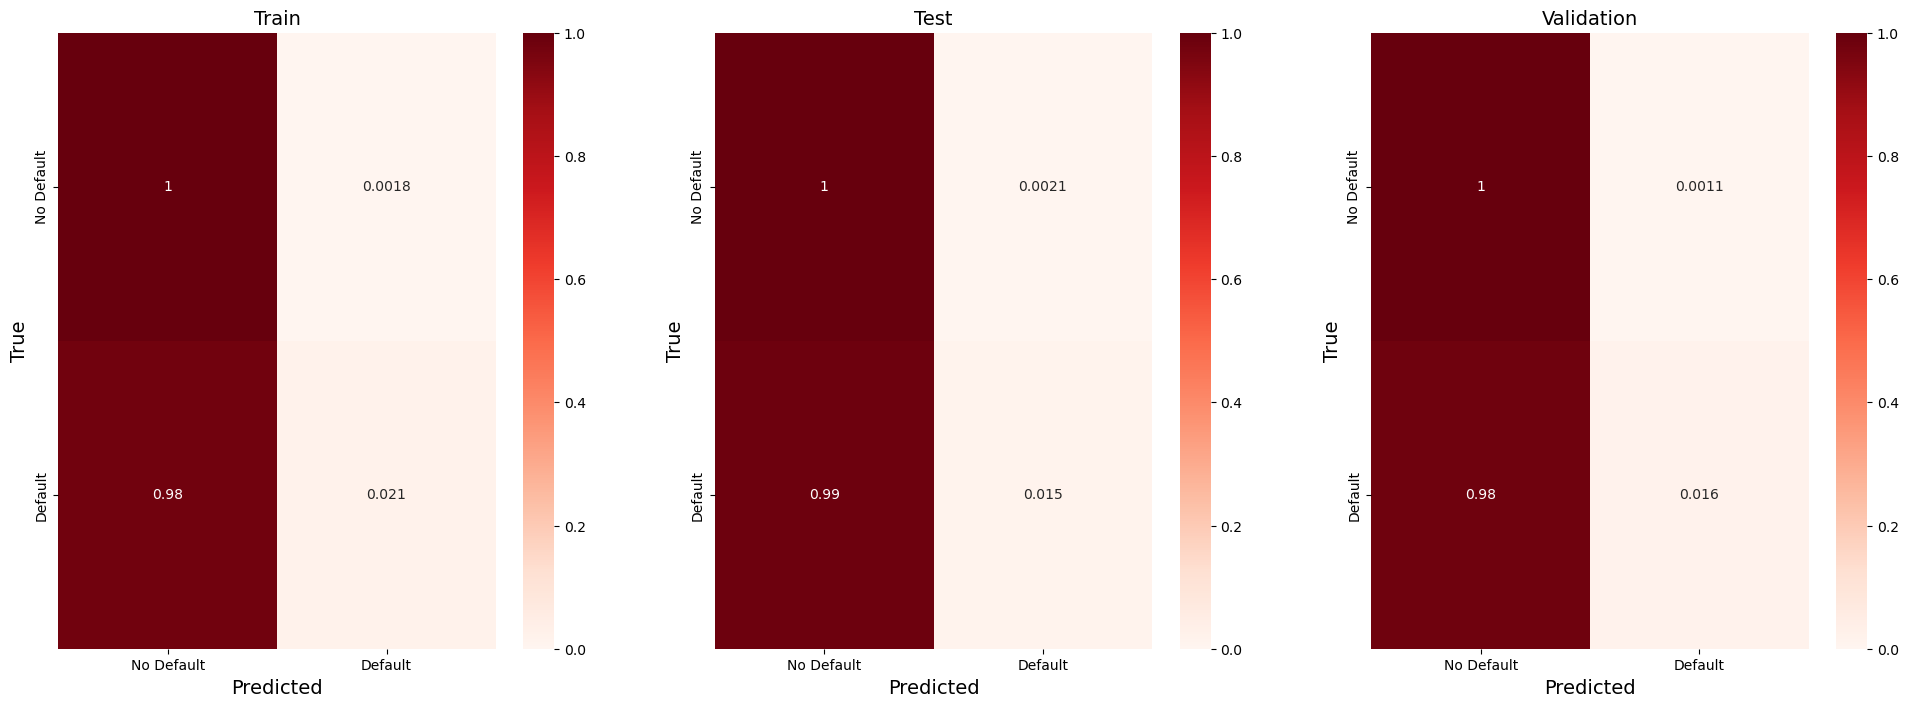

In [142]:
# Confusion matrix for baseline model
confusion_matrix_def(model, X_train, y_train, X_test, y_test, X_valid, y_valid, cnfmatrix)
plt.show()

## AUC Curve

In [143]:
from sklearn.metrics import roc_curve, plot_roc_curve

def roc_curve_plot(model, X_train, y_train, X_test, y_test, X_valid, y_valid, fprs, tprs, name):
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    fprs.append(fpr)
    tprs.append(tpr)
    # plot combined ROC curve for train, valid, test
    train_roc_plot = plot_roc_curve(model, X_train, y_train, name="TrainRocAuc")
    test_roc_plot = plot_roc_curve(model, X_test, y_test, name="TestRocAuc", ax=train_roc_plot.ax_)
    valid_roc_plot = plot_roc_curve(model, X_valid, y_valid, name="ValidRocAuc", ax=test_roc_plot.ax_)
    valid_roc_plot.ax_.set_title ("ROC Curve Comparison - " + name)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", borderaxespad=0)
    plt.show()
    return fprs, tprs

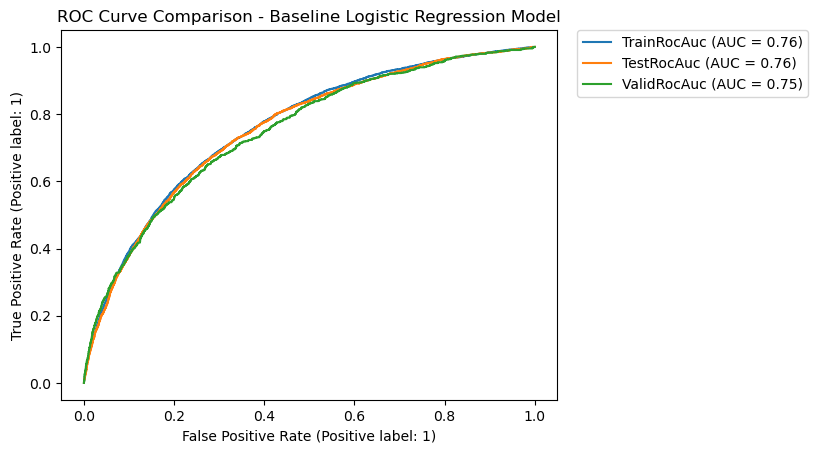

In [144]:
_,_ = roc_curve_plot(model, X_train, y_train, X_test, y_test, X_valid, y_valid
                     , fprs, tprs, "Baseline Logistic Regression Model")

# Tune Baseline Model Parameters with GridSearch

The baseline Logistic Regression model was tuned across different parameters evaluated for the following metrics:
* Train Accuracy
* Cross fold Train Accuracy
* Test Accuracy
* Train AUC Score
* Cross fold AUC Score
* Test AUC Score
* Train Precision
* Cross fold Precision
* Test Precision
* Train Recall
* Cross fold Recall
* Test Recall
* p-value
* Train RMSE Score
* Cross fold RMSE Score
* Test RMSE Score
* Train MAE Score
* Cross fold MAE Score
* Test MAE Score

## Perform Grid Search

In [145]:
import json
from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC      # Not implementing due to technical constraints
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [149]:
classifiers = [
        [('Logistic Regression', LogisticRegression(random_state=42))],
        [('Naive Bayes', GaussianNB())],
#         [('Support Vector', SVC(random_state=42,probability=True),"SVM")],
        [('Gradient Boosting', GradientBoostingClassifier(random_state=42))],
        [('XGBoost', XGBClassifier(random_state=42))],
        [('DecisionTrees', DecisionTreeClassifier(random_state=42))],
        [('RandomForest', RandomForestClassifier(random_state=42))]
   ]

params_grid = {
        'Logistic Regression': {
            'penalty': ('l1', 'l2'),
            'tol': [0.0001], 
            'C': (0.01, 0.001, 0.0001),
        },
    
        'Naive Bayes': {
            'var_smoothing': [1e-8, 1e-9, 1e-10]
        },
    
#         'Support Vector' : {
#             'kernel': ('rbf','poly'),     
#             'degree': (4, 5),
#             'C': ( 0.001, 0.01),   #Low C - allow for misclassification
#             'gamma':(0.01,0.1,1)  #Low gamma - high variance and low bias
#         },
  
        'Gradient Boosting':  {
            'max_depth': [5,10], 
            'max_features': [10,15],
            'n_iter_no_change': [5],
            'tol': (0.001, 0.0001), 
            'n_estimators': [500],
            'subsample': [0.85],            
            'min_samples_leaf' : [3,5]   
        },
    
        'XGBoost':  {
            'max_depth': [3,5], # Lower helps with overfitting
            'n_estimators': [1000],
            'objective': ['binary:logistic'],
            'eta' : [0.01,0.1],
#             'colsample_bytree' : [0.2,0.5], 
        },
    
        'DecisionTrees' : {
            'criterion': ['gini','entropy'],
            'max_depth': range(1,5),
            'min_samples_leaf': range(1,5)
        },
    
        'RandomForest':  {
            'max_depth': [5,10],
            'max_features': [10,15],
            'min_samples_leaf': [3],
            'min_impurity_decrease': [1e-3,1e-4,1e-6],
            'n_estimators': [1000]
        }
        
}

Import necesssary libraries to determine feature importance for different classifiers:

In [154]:
def runGridSearch(classifiers, cnfmatrix, fprs, tprs):
    for (name, classifier) in classifiers:
            # Print classifier and parameters
            print('****** START', name,'*****')
            parameters = params_grid[name]
            print("Parameters:")
            for p in sorted(parameters.keys()):
                print("\t"+str(p)+": "+ str(parameters[p]))

            # generate the pipeline for each classifier
            full_pipeline_with_predictor = Pipeline([
                ("preparation", data_prep_pipeline),
                ("predictor", classifier)
                ])

            # Execute the grid search
            params = {}
            for p in parameters.keys():
                pipe_key = 'predictor__'+str(p)
                params[pipe_key] = parameters[p] 
            grid_search = GridSearchCV(full_pipeline_with_predictor, params, cv=cvSplits, scoring='roc_auc',
                                       n_jobs=-1,verbose=1)
            grid_search.fit(X_train, y_train)

            # Best estimator score
            best_train = pct(grid_search.best_score_)

            # Best train scores
            print("Cross validation with best estimator")
            best_train_scores = cross_validate(grid_search.best_estimator_, X_train, y_train,cv=cvSplits,scoring=make_scorer(log_loss), 
                                               return_train_score=True, n_jobs=-1)  

            #get all scores
#             best_train_accuracy = np.round(best_train_scores['train_accuracy'].mean(),4)
            best_train_logloss = np.round(best_train_scores['train_score'].mean(),4)
#             best_train_roc_auc = np.round(best_train_scores['train_roc_auc'].mean(),4)

            valid_time = np.round(best_train_scores['score_time'].mean(),4)
#             best_valid_accuracy = np.round(best_train_scores['test_accuracy'].mean(),4)
            best_valid_logloss = np.round(best_train_scores['test_score'].mean(),4)
#             best_valid_roc_auc = np.round(best_train_scores['test_roc_auc'].mean(),4)
            
            # Conduct t-test with baseline logit (control) and best estimator (experiment)
            (t_stat, p_value) = stats.ttest_rel(logit_scores['train_score'], best_train_scores['train_score'])

            #test and Prediction with whole data
            # Best estimator fitting time
            print("Fit and Prediction with best estimator")
            start = time()
            model = grid_search.best_estimator_.fit(X_train, y_train)
            train_time = round(time() - start, 4)

            # Best estimator prediction time
            start = time()
            y_test_pred = model.predict(X_test)
            test_time = round(time() - start, 4)
            scores.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
            accuracy.append(accuracy_score(y_test, y_test_pred))

            # Create confusion matrix for the best model
            cnfmatrix = confusion_matrix_def(model, X_train, y_train, X_test, y_test, X_valid, y_valid, cnfmatrix)

            # Create AUC ROC curve
            fprs, tprs = roc_curve_plot(model, X_train, y_train, X_test, y_test, X_valid, y_valid, fprs, tprs, name)

            #Best Model
            final_best_clf[name] = pd.DataFrame([{'label': grid_search.best_estimator_.named_steps['predictor'].__class__.__name__,
                                           'predictor': grid_search.best_estimator_.named_steps['predictor']}])
#             #Feature importance 
#             feature_name = num_attribs + list(grid_search.best_estimator_.named_steps['preparation'].transformers[1][1].named_steps['selector'].attribute_names)   
#             feature_list = feature_name

            #append all results
            results.append(accuracy_score(y_train, model.predict(X_train)))
            names.append(name)

            print("Best Parameters:")
            best_parameters = grid_search.best_estimator_.get_params()
            param_dump = []
            for param_name in sorted(params.keys()):
                param_dump.append((param_name, best_parameters[param_name]))
                print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
            print("****** FINISH",name," *****")
            print("")

            # Record the results
            y_train_pred = model.predict(X_train)
            y_valid_pred = model.predict(X_valid)
            y_test_pred = model.predict(X_test)

            y_train_pred_prob = model.predict_proba(X_train)[:, 1]
            y_valid_pred_prob = model.predict_proba(X_valid)[:, 1]
            y_test_pred_prob = model.predict_proba(X_test)[:, 1]
            
            exp_name = name
            expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
                    [accuracy_score(y_train, y_train_pred), 
                    accuracy_score(y_valid, y_valid_pred),
                    accuracy_score(y_test, y_test_pred),
                    roc_auc_score(y_train, y_train_pred_prob),
                    roc_auc_score(y_valid, y_valid_pred_prob),
                    roc_auc_score(y_test, y_test_pred_prob),
                    precision_score(y_train, y_train_pred), 
                    precision_score(y_valid, y_valid_pred),
                    precision_score(y_test, y_test_pred),
                    recall_score(y_train, y_train_pred), 
                    recall_score(y_valid, y_valid_pred),
                    recall_score(y_test, y_test_pred),
                    best_train_logloss,
                    best_valid_logloss, 
                    log_loss(y_test, y_test_pred),
                    p_value,
                    np.round(np.sqrt(mean_squared_error(y_train, y_train_pred_prob)), 3),
                    np.round(np.sqrt(mean_squared_error(y_valid, y_valid_pred_prob)), 3),
                    np.round(np.sqrt(mean_squared_error(y_test, y_test_pred_prob)), 3),
                    np.round(mean_absolute_error(y_train, y_train_pred_prob), 3),
                    np.round(mean_absolute_error(y_valid, y_valid_pred_prob), 3),
                    np.round(mean_absolute_error(y_test, y_test_pred_prob), 3)], 4)) \
                    + [train_time,valid_time,test_time] \
                    + [json.dumps(param_dump)]

### Logistic Regression

****** START Logistic Regression *****
Parameters:
	C: (0.01, 0.001, 0.0001)
	penalty: ('l1', 'l2')
	tol: [0.0001]
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Cross validation with best estimator
Fit and Prediction with best estimator


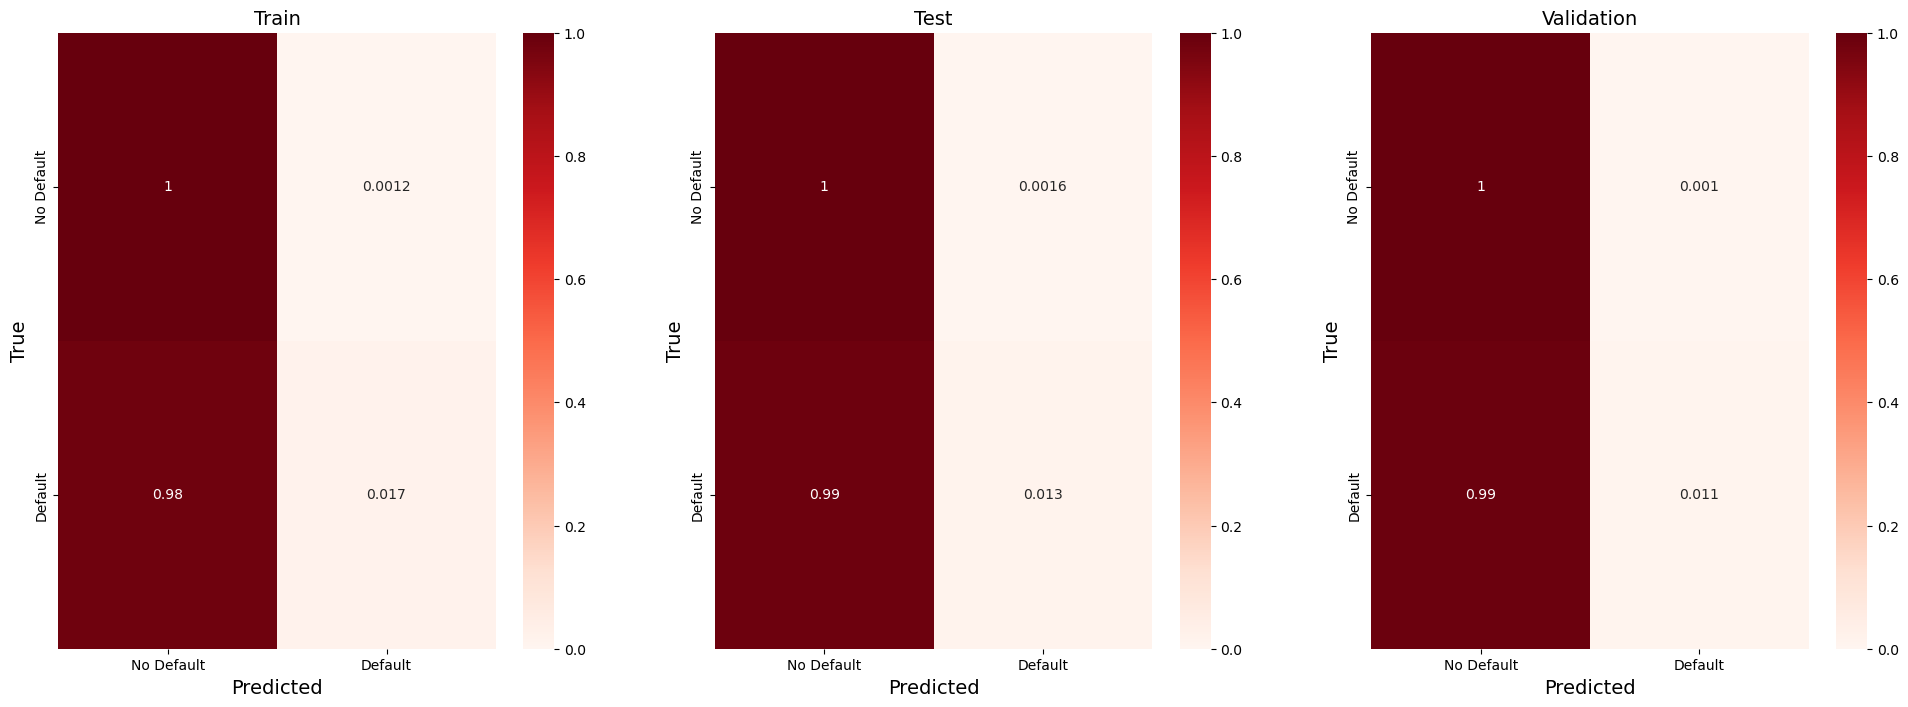

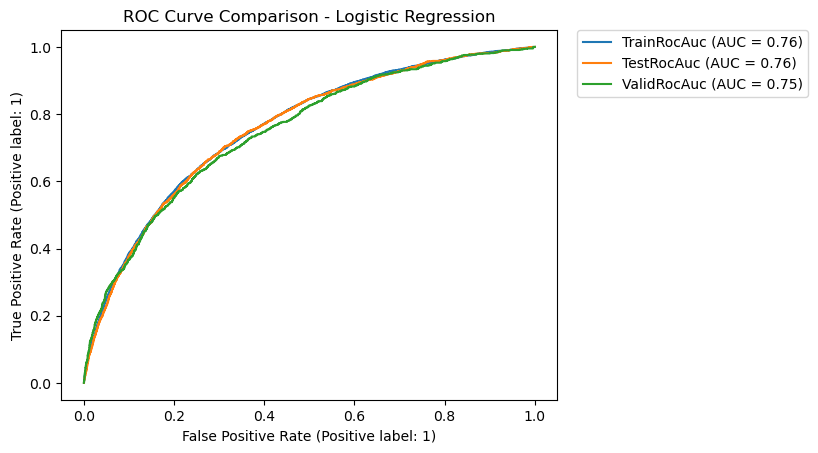

Best Parameters:
	predictor__C: 0.01
	predictor__penalty: l2
	predictor__tol: 0.0001
****** FINISH Logistic Regression  *****



In [155]:
runGridSearch(classifiers[0], cnfmatrix, fprs, tprs)

### Naive Bayes

****** START Naive Bayes *****
Parameters:
	var_smoothing: [1e-08, 1e-09, 1e-10]
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Cross validation with best estimator
Fit and Prediction with best estimator


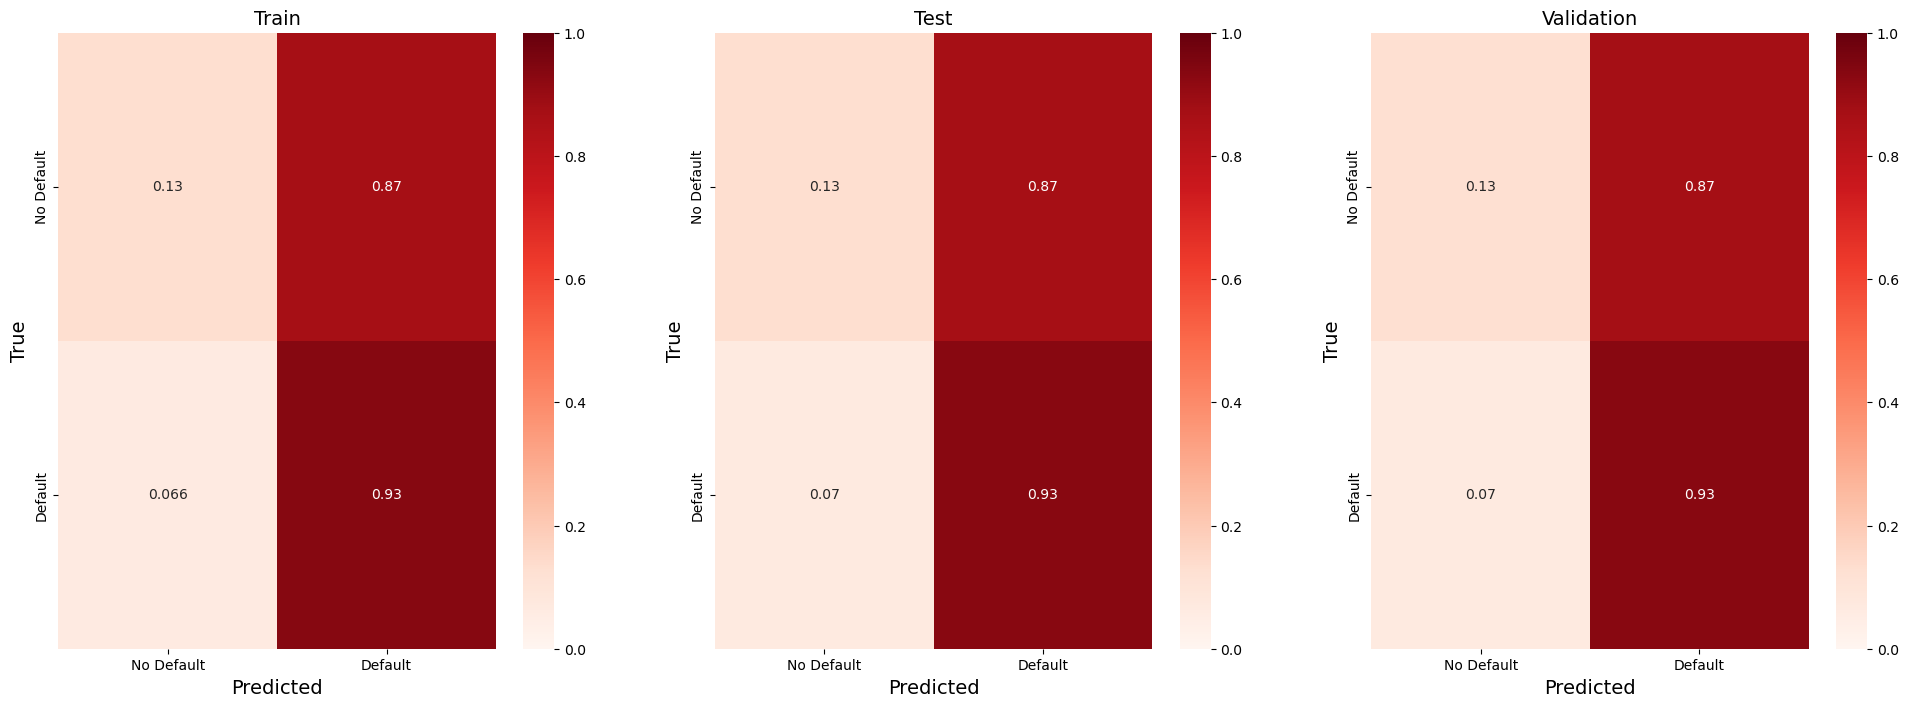

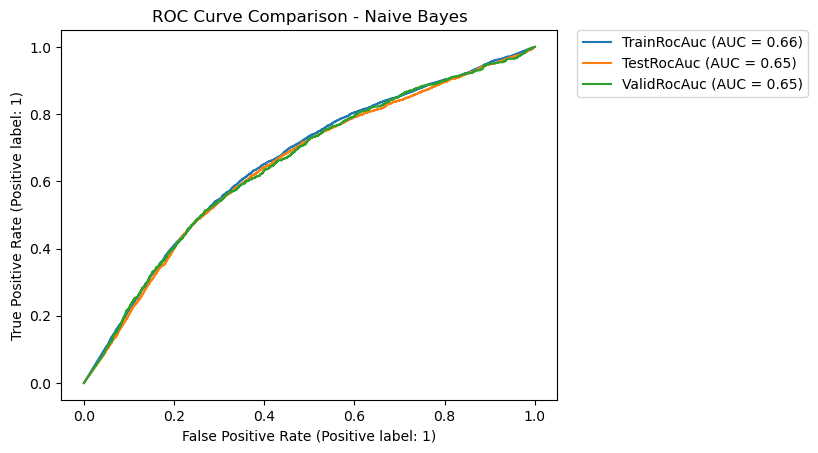

Best Parameters:
	predictor__var_smoothing: 1e-08
****** FINISH Naive Bayes  *****



In [158]:
runGridSearch(classifiers[1], cnfmatrix, fprs, tprs)

### Gradient Boosting

****** START Gradient Boosting *****
Parameters:
	max_depth: [5, 10]
	max_features: [10, 15]
	min_samples_leaf: [3, 5]
	n_estimators: [500]
	n_iter_no_change: [5]
	subsample: [0.85]
	tol: (0.001, 0.0001)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Cross validation with best estimator
Fit and Prediction with best estimator


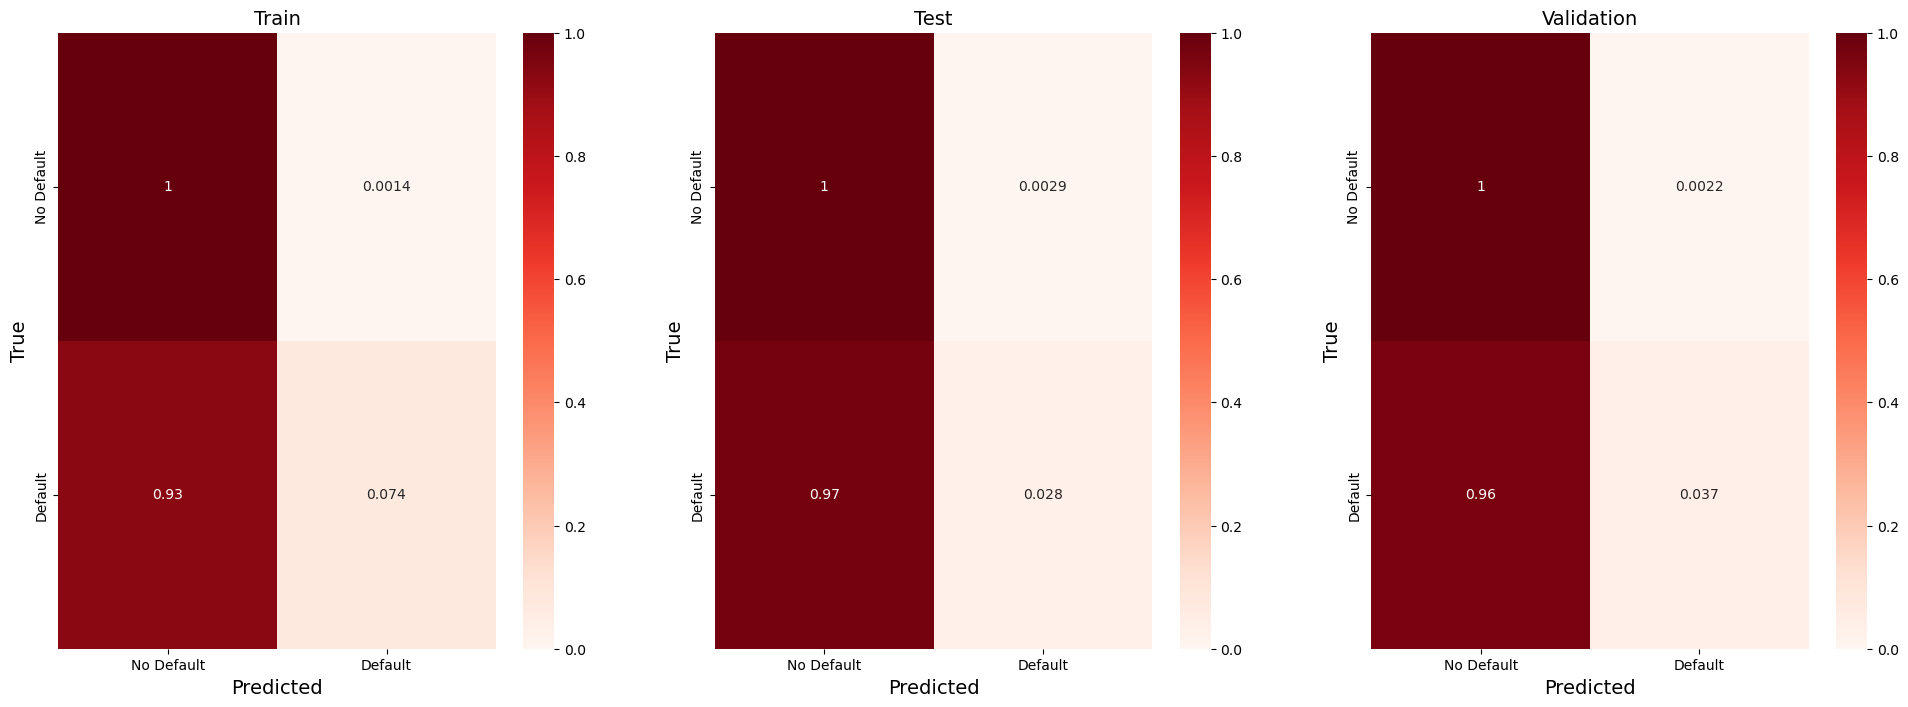

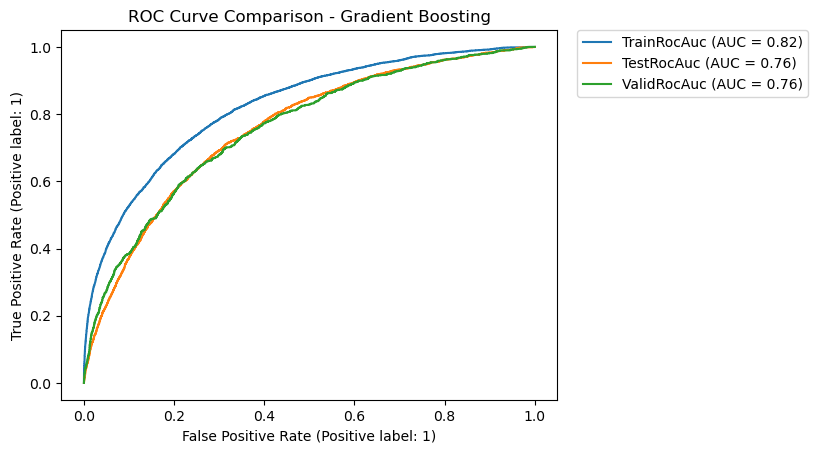

Best Parameters:
	predictor__max_depth: 5
	predictor__max_features: 10
	predictor__min_samples_leaf: 5
	predictor__n_estimators: 500
	predictor__n_iter_no_change: 5
	predictor__subsample: 0.85
	predictor__tol: 0.0001
****** FINISH Gradient Boosting  *****



In [159]:
runGridSearch(classifiers[2], cnfmatrix, fprs, tprs)

### XGBoost

In [124]:
classifiers[3]

[('XGBoost',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=42, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=None))]

****** START XGBoost *****
Parameters:
	eta: [0.01, 0.1]
	max_depth: [3, 5]
	n_estimators: [1000]
	objective: ['binary:logistic']
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[18:55:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross validation with best estimator
Fit and Prediction with best estimator
[19:04:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


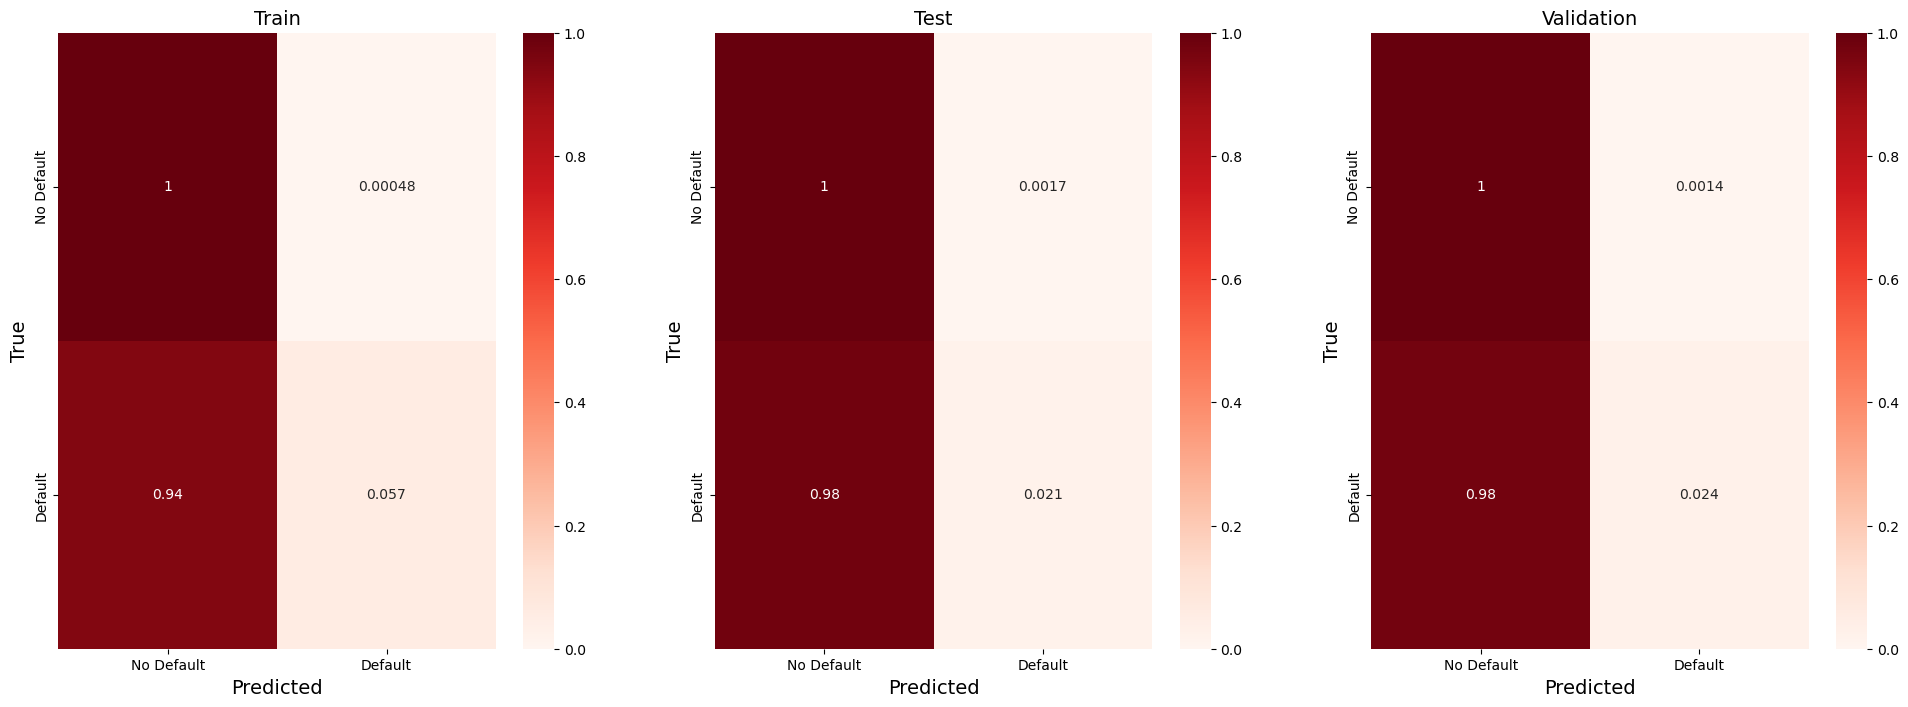

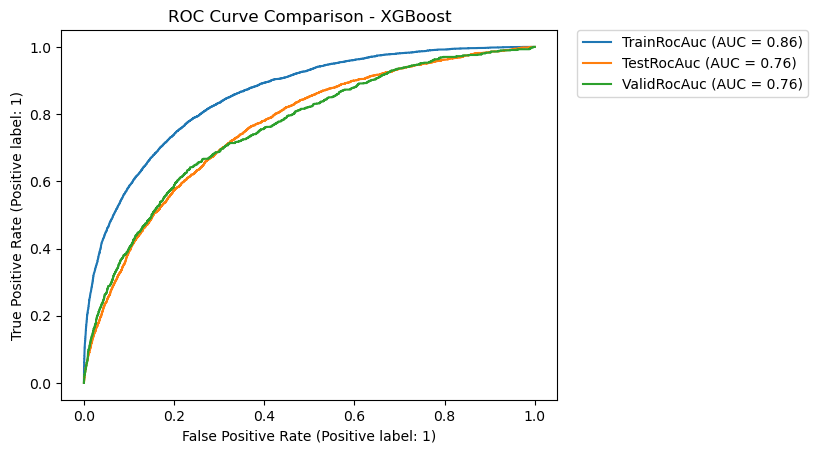

Best Parameters:
	predictor__eta: 0.01
	predictor__max_depth: 5
	predictor__n_estimators: 1000
	predictor__objective: binary:logistic
****** FINISH XGBoost  *****



In [160]:
runGridSearch(classifiers[3], cnfmatrix, fprs, tprs)

### Decision Trees

In [123]:
classifiers[4]

[('DecisionTrees', DecisionTreeClassifier(random_state=42))]

****** START DecisionTrees *****
Parameters:
	criterion: ['gini', 'entropy']
	max_depth: range(1, 5)
	min_samples_leaf: range(1, 5)
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Cross validation with best estimator
Fit and Prediction with best estimator


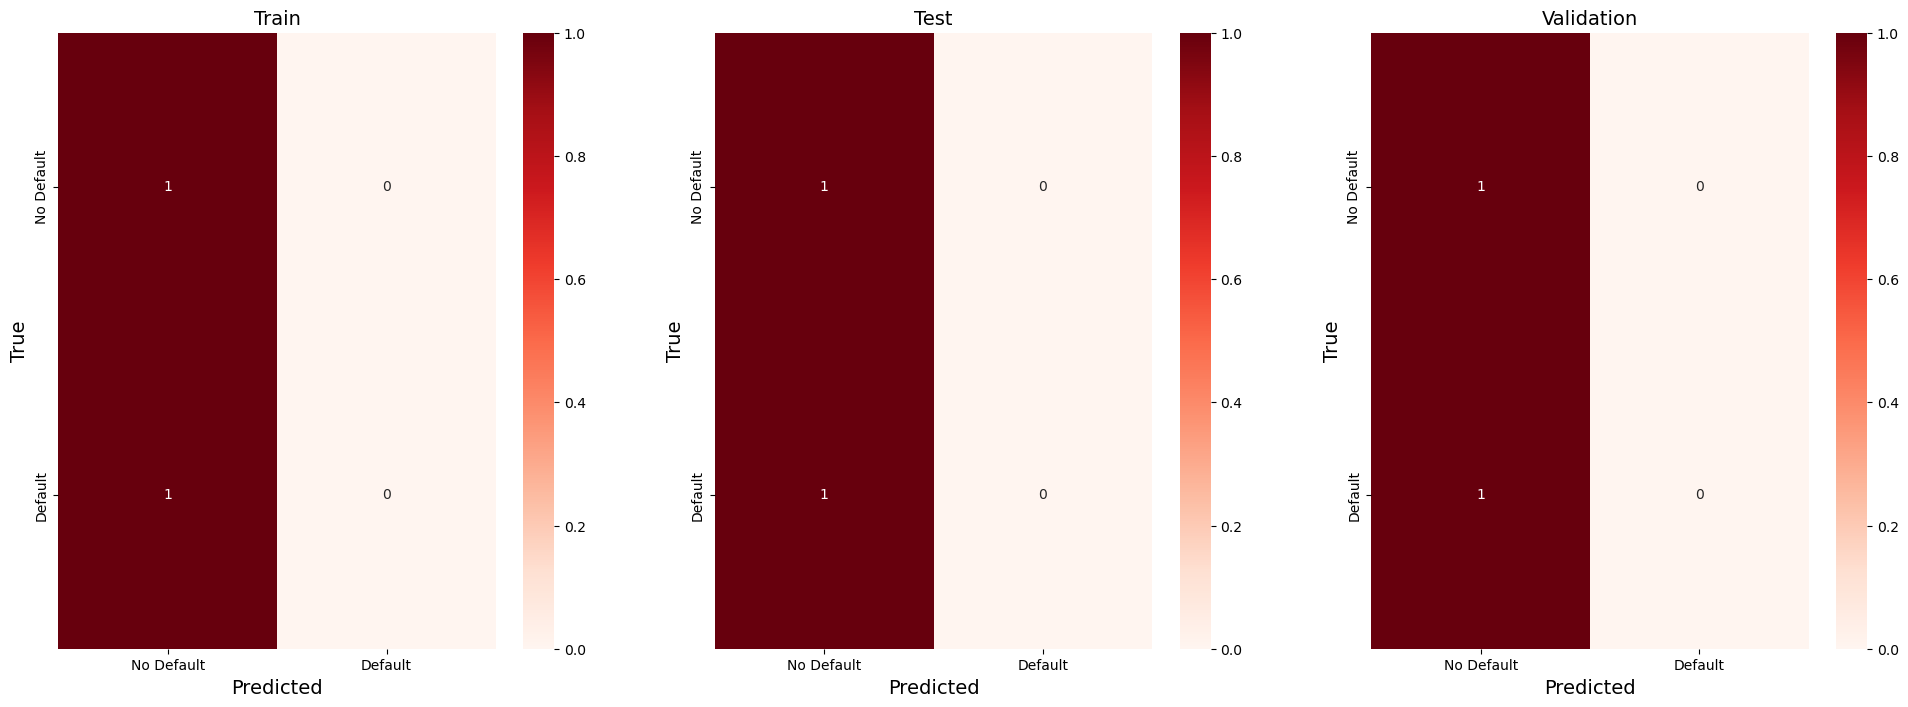

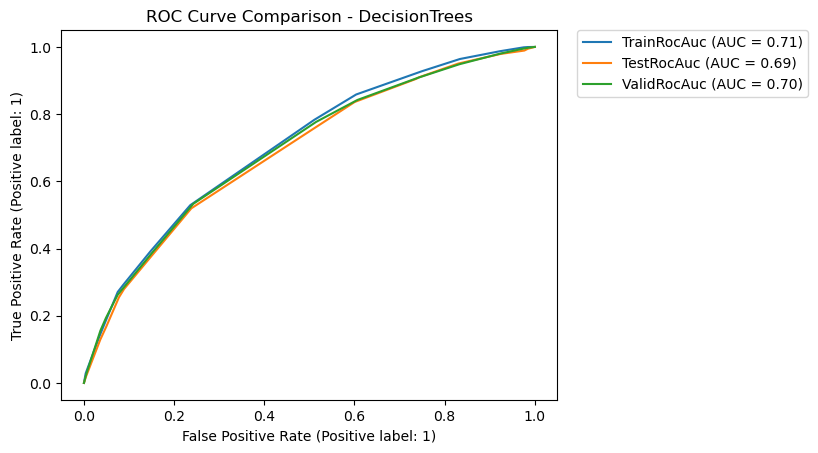

Best Parameters:
	predictor__criterion: entropy
	predictor__max_depth: 4
	predictor__min_samples_leaf: 1
****** FINISH DecisionTrees  *****



In [161]:
runGridSearch(classifiers[4], cnfmatrix, fprs, tprs)

### Random Forest

****** START RandomForest *****
Parameters:
	max_depth: [5, 10]
	max_features: [10, 15]
	min_impurity_decrease: [0.001, 0.0001, 1e-06]
	min_samples_leaf: [3]
	n_estimators: [1000]
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Cross validation with best estimator
Fit and Prediction with best estimator


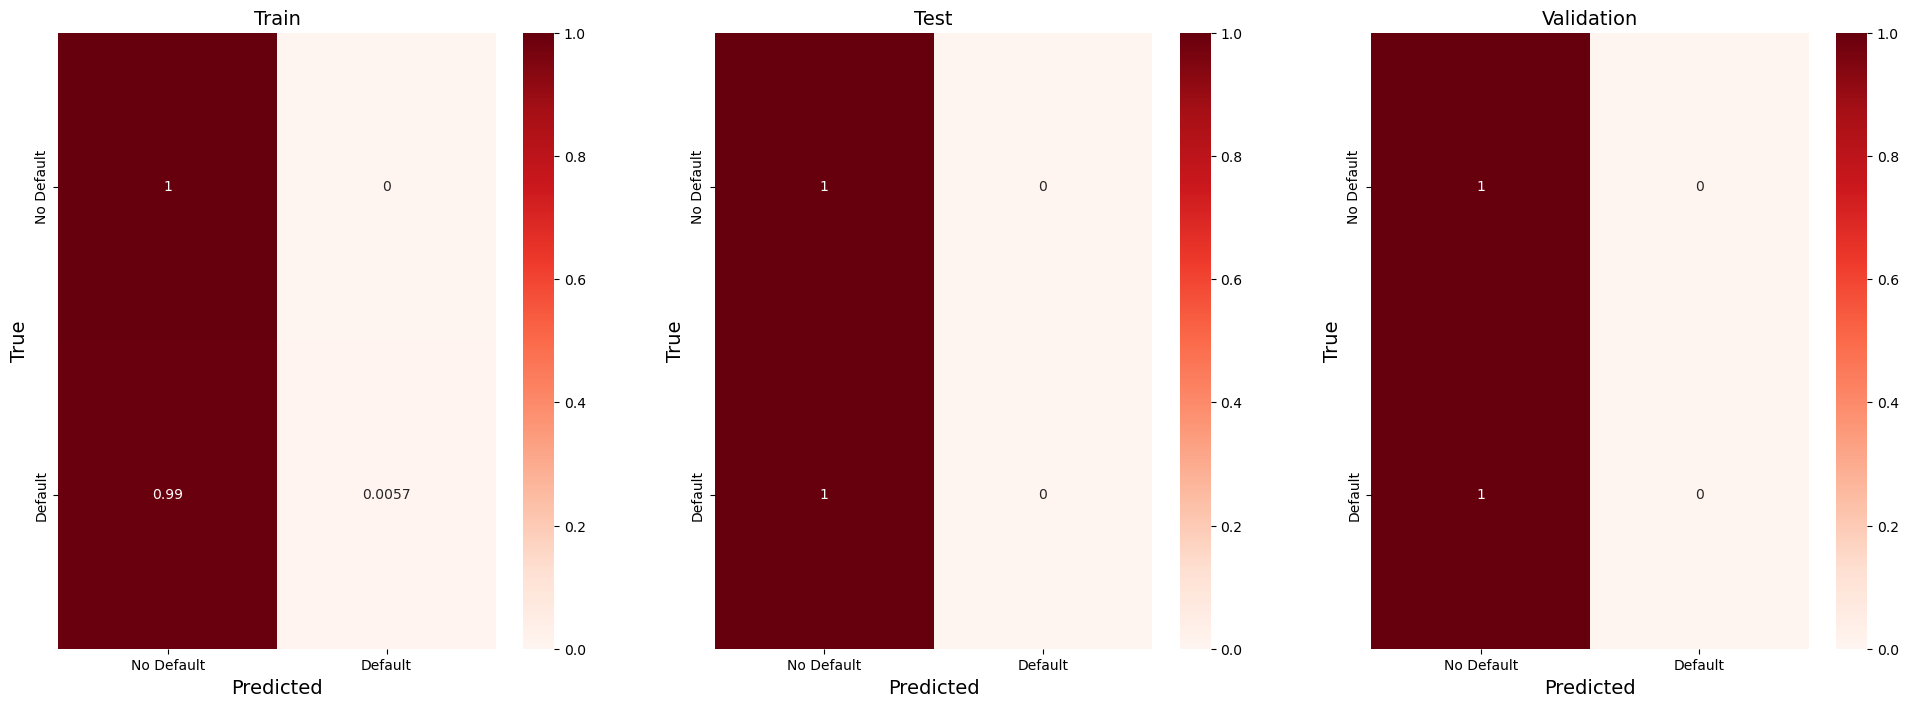

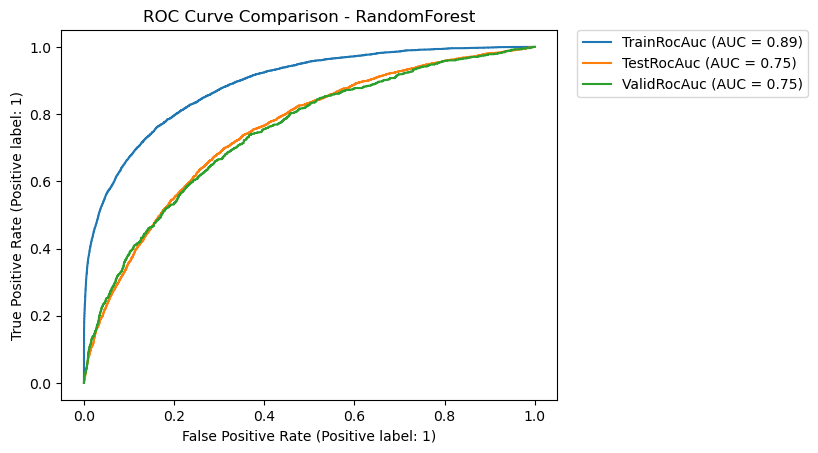

Best Parameters:
	predictor__max_depth: 10
	predictor__max_features: 10
	predictor__min_impurity_decrease: 1e-06
	predictor__min_samples_leaf: 3
	predictor__n_estimators: 1000
****** FINISH RandomForest  *****



In [162]:
runGridSearch(classifiers[5], cnfmatrix, fprs, tprs)

## Final Results
<a id='final_results'></a> 

In [164]:
print('Final experiment results:')
expLog

Final experiment results:


exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_91_features     0.9188     0.9191     0.9182     0.7615   
1   Logistic Regression     0.9191     0.9188     0.9185     0.7589   
2           Naive Bayes     0.1960     0.1929     0.1944     0.6583   
3     Gradient Boosting     0.9235     0.9197     0.9185     0.8244   
4               XGBoost     0.9230     0.9194     0.9190     0.8563   
5         DecisionTrees     0.9188     0.9188     0.9188     0.7059   
6          RandomForest     0.9193     0.9188     0.9188     0.8884   

   Valid AUC  Test  AUC  Train Precision  Valid Precision  Test Precision  \
0     0.7504     0.7567           0.4976           0.5600          0.3895   
1     0.7490     0.7561           0.5592           0.5000          0.4286   
2     0.6522     0.6489           0.0867           0.0861          0.0862   
3     0.7582     0.7580           0.8198           0.5926          0.4636   
4     0.7592     0.7619           0.9132           0.6000          0.5200   
5     0.6966     0.6896           0.0000           0.0000          0.0000   
6     0.7454     0.7502           1.0000           0.0000          0.0000   

   Train Recall  Valid Recall  Test Recall  Train Log Loss  Valid Log Loss  \
0        0.0206        0.0160       0.0148          2.7957          2.8187   
1        0.0172        0.0114       0.0132          2.7889          2.8107   
2        0.9340        0.9302       0.9303         27.8160         27.8216   
3        0.0735        0.0366       0.0280          2.6279          2.8179   
4        0.0574        0.0240       0.0208          2.6005          2.8024   
5        0.0000        0.0000       0.0000          2.7960          2.8183   
6        0.0057        0.0000       0.0000          2.7792          2.8111   

   Test Log Loss  P Score  Train RMSE  Valid RMSE  Test  RMSE  Train MAE  \
0         2.8269   0.0000       0.261       0.261       0.262      0.136   
1         2.8157   0.0477       0.261       0.261       0.262      0.137   
2        27.8264   0.0000       0.887       0.889       0.888      0.801   
3         2.8157   0.0000       0.248       0.260       0.262      0.129   
4         2.7989   0.0000       0.244       0.260       0.261      0.127   
5         2.8034   0.8562       0.266       0.267       0.267      0.141   
6         2.8034   0.0001       0.248       0.264       0.264      0.133   

   Valid MAE  Test  MAE  Train Time  Valid Time  Test Time  \
0      0.137      0.136      8.4338      0.2404     0.4999   
1      0.137      0.137      2.3704      0.1238     0.3695   
2      0.804      0.802      1.2817      0.1896     0.3890   
3      0.136      0.136     11.6299      0.1884     0.4543   
4      0.135      0.136     91.5141      0.4896     0.4168   
5      0.142      0.142      2.8795      0.1263     0.3351   
6      0.142      0.142    169.8257      2.6308     4.1866   

                                         Description  
0                                     Baseline LR 91  
1  [["predictor__C", 0.01], ["predictor__penalty"...  
2              [["predictor__var_smoothing", 1e-08]]  
3  [["predictor__max_depth", 5], ["predictor__max...  
4  [["predictor__eta", 0.01], ["predictor__max_de...  
5  [["predictor__criterion", "entropy"], ["predic...  
6  [["predictor__max_depth", 10], ["predictor__ma...

## Feature Importance - Logistic Regression, Decision Tree and Random Forest
<a id='feat_imp'></a> 

Set-up function to be used for Gradient Boosting and Decision Tree models. Logistic regression has a slightly different logic (which is coded in the section immediately below) so it does not use the function below.

In [300]:
def findFeatImportance(name, classifier):
    # Print classifier and parameters
    print('****** START', name,'*****')
    parameters = params_grid[name]
    print("Parameters:")
    for p in sorted(parameters.keys()):
        print("\t"+str(p)+": "+ str(parameters[p]))

    # generate the pipeline for each classifier
    full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("predictor", classifier)
        ])

    # Execute the grid search
    params = {}
    for p in parameters.keys():
        pipe_key = 'predictor__'+str(p)
        params[pipe_key] = parameters[p] 
    grid_search = GridSearchCV(full_pipeline_with_predictor, params, cv=cvSplits, scoring='roc_auc',
                               n_jobs=-1,verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Get importance
    importances = grid_search.best_estimator_.named_steps["predictor"].feature_importances_
    
    return importances

In [291]:
features = list(X_train.columns)

### Logistic Regression

In [313]:
name = classifiers[0][0][0]
print(name)

classifier = classifiers[0][0][1]
print(classifier)

Logistic Regression
LogisticRegression(random_state=42)


In [314]:
# Print classifier and parameters
print('****** START', name,'*****')
parameters = params_grid[name]
print("Parameters:")
for p in sorted(parameters.keys()):
    print("\t"+str(p)+": "+ str(parameters[p]))

# generate the pipeline for each classifier
full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("predictor", classifier)
    ])

# Execute the grid search
params = {}
for p in parameters.keys():
    pipe_key = 'predictor__'+str(p)
    params[pipe_key] = parameters[p] 
grid_search = GridSearchCV(full_pipeline_with_predictor, params, cv=cvSplits, scoring='roc_auc',
                           n_jobs=-1,verbose=1)
grid_search.fit(X_train, y_train)

# Get importance
importances = grid_search.best_estimator_.named_steps["predictor"].coef_[0]

****** START Logistic Regression *****
Parameters:
	C: (0.01, 0.001, 0.0001)
	penalty: ('l1', 'l2')
	tol: [0.0001]
Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [318]:
lr_indices = np.argsort(abs(importances))[::-1]

In [320]:
lr_indices[:11]

array([ 2,  3, 10,  1,  0, 85, 84, 23, 22, 59, 54])

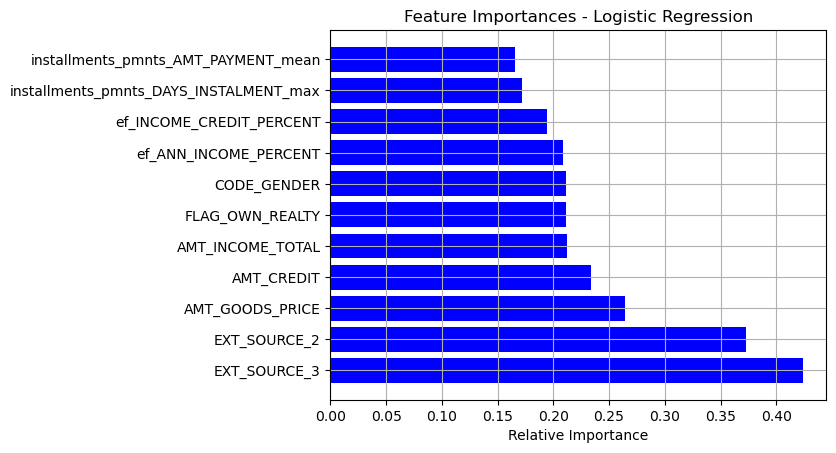

In [322]:
plt.title('Feature Importances - ' + name)
plt.barh(range(11), abs(importances[lr_indices[:11]]), color='b', align='center')
plt.yticks(range(11), [features[i] for i in lr_indices[:11]])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

### Gradient Boosting

In [279]:
name = classifiers[2][0][0]
print(name)

classifier = classifiers[2][0][1]
print(classifier)

Gradient Boosting
GradientBoostingClassifier(random_state=42)


In [280]:
gb_importances = findFeatImportance(name, classifier)

****** START Gradient Boosting *****
Parameters:
	max_depth: [5, 10]
	max_features: [10, 15]
	min_samples_leaf: [3, 5]
	n_estimators: [500]
	n_iter_no_change: [5]
	subsample: [0.85]
	tol: (0.001, 0.0001)
Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [292]:
gb_indices = np.argsort(gb_importances)[::-1]

In [286]:
gb_importances[gb_indices[:11]]

array([0.15220906, 0.13524995, 0.05301033, 0.02882706, 0.02499978,
       0.02487445, 0.01939031, 0.01784891, 0.01543193, 0.01470172,
       0.01434265])

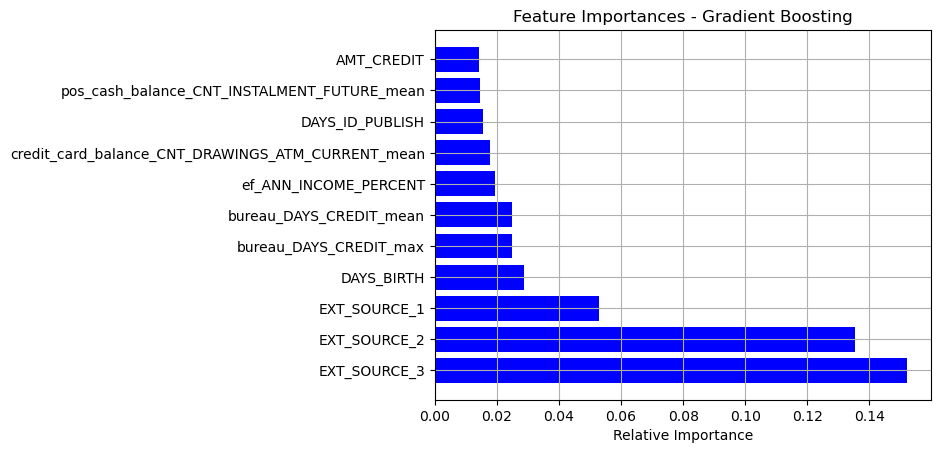

In [293]:
plt.title('Feature Importances - ' + name)
plt.barh(range(11), gb_importances[indices[:11]], color='b', align='center')
plt.yticks(range(11), [features[i] for i in gb_indices[:11]])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

### XGBoost

In [323]:
name = classifiers[3][0][0]
print(name)

classifier = classifiers[3][0][1]
print(classifier)

XGBoost
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=42, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [325]:
xg_importances = findFeatImportance(name, classifier)
# Unable to run, taking too long

****** START XGBoost *****
Parameters:
	eta: [0.01, 0.1]
	max_depth: [3, 5]
	n_estimators: [1000]
	objective: ['binary:logistic']
Fitting 5 folds for each of 4 candidates, totalling 20 fits


KeyboardInterrupt: 

In [ ]:
xg_indices = np.argsort(xg_importances)[::-1]

In [ ]:
plt.title('Feature Importances - ' + name)
plt.barh(range(7), xg_importances[xg_indices[:7]], color='b', align='center')
plt.yticks(range(7), [features[i] for i in xg_indices[:7]])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

### Decision Tree

In [299]:
name = classifiers[4][0][0]
print(name)

classifier = classifiers[4][0][1]
print(classifier)

DecisionTrees
DecisionTreeClassifier(random_state=42)


In [301]:
dt_importances = findFeatImportance(name = classifiers[4][0][0], classifier = classifiers[4][0][1])

****** START DecisionTrees *****
Parameters:
	criterion: ['gini', 'entropy']
	max_depth: range(1, 5)
	min_samples_leaf: range(1, 5)
Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [303]:
dt_indices = np.argsort(dt_importances)[::-1]

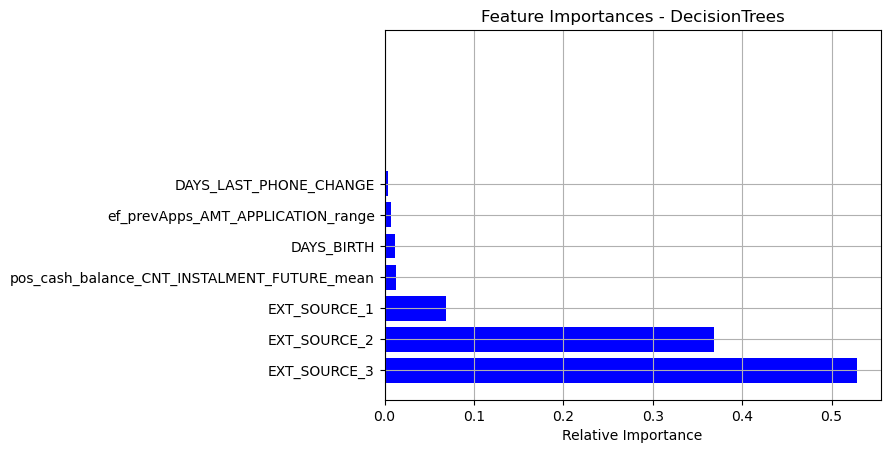

In [312]:
plt.title('Feature Importances - ' + name)
plt.barh(range(7), dt_importances[dt_indices[:7]], color='b', align='center')
plt.yticks(range(7), [features[i] for i in dt_indices[:7]])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

# Kaggle submission via the command line API

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [328]:
name = classifiers[2][0][0]
print(name)

classifier = classifiers[2][0][1]
print(classifier)

Gradient Boosting
GradientBoostingClassifier(random_state=42)


In [329]:
# Print classifier and parameters
print('****** START', name,'*****')
parameters = params_grid[name]
print("Parameters:")
for p in sorted(parameters.keys()):
    print("\t"+str(p)+": "+ str(parameters[p]))

# generate the pipeline for each classifier
full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("predictor", classifier)
    ])

# Execute the grid search
params = {}
for p in parameters.keys():
    pipe_key = 'predictor__'+str(p)
    params[pipe_key] = parameters[p] 
grid_search = GridSearchCV(full_pipeline_with_predictor, params, cv=cvSplits, scoring='roc_auc',
                           n_jobs=-1,verbose=1)
grid_search.fit(X_train, y_train)

print("Fit and Prediction with best estimator")
model = grid_search.best_estimator_.fit(X_train, y_train)
print('****** END', name,'*****')

****** START Gradient Boosting *****
Parameters:
	max_depth: [5, 10]
	max_features: [10, 15]
	min_samples_leaf: [3, 5]
	n_estimators: [500]
	n_iter_no_change: [5]
	subsample: [0.85]
	tol: (0.001, 0.0001)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fit and Prediction with best estimator
****** END Gradient Boosting *****


In [330]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]

In [331]:
test_class_scores[0:10]

array([0.08014695, 0.08202941, 0.03076722, 0.02388138, 0.12220071,
       0.03362661, 0.02312744, 0.0428502 , 0.02653686, 0.08951652])

In [332]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

SK_ID_CURR    TARGET
0      100001  0.080147
1      100005  0.082029
2      100013  0.030767
3      100028  0.023881
4      100038  0.122201

In [333]:
submit_df.to_csv("submission_P2.csv",index=False)

In [334]:
! kaggle competitions submit -c home-credit-default-risk -f submission_P2.csv -m "Phase 2 XGBoost submission"

100%|███████████████████████████████████████| 1.26M/1.26M [00:02<00:00, 460kB/s]
Successfully submitted to Home Credit Default Risk

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

<img src='Kaggle_submission_v2.png'>

# Write-up 

## Abstract
The HCDR project aims to create a machine learning model that can accurately predict customer defaulting on loan repayment. In Phase 1, we developed a baseline logistic regression model to achieve a ROC_AUC score of 0.74306. 

In Phase 2, we wanted to improve our performance with new features and evaluate other algorithms. We engineered additional features and performed Grid Search with six classification algorithms to tune hyperparameters. XGBoost performed the best with highest test accuracy of 91.90%, AUC of 76.19%, and better precision and recall scores. Gradient Boosting came very close with accuracy and AUC scores but slightly underperformed relative to XGBoost in precision and recall. Naive Bayes performed the worst among all models with lowest accuracy at 19.5% and highest log loss at 27.8. Decision Trees and Random Forest performed no better than baseline.

Our best ROC_AUC score for Kaggle submission was 0.74779.


## Project Description
Home Credit is an international non-bank financial institution that aims to lend people money regardless of their credit history. Home credit groups focus on providing a positive borrowing experience for customers who do not bank on traditional sources. Thus, Home Credit Group published a dataset on Kaggle with the goal of identifying and solving unfair loan rejection.

The purpose of this project is to create a machine learning model which can accurately predict the customer behavior on repayment of the loan. Our task is to form a pipeline to build a baseline machine learning model using logistic regression classification algorithms. The final model will be evaluated using a number of different performance metrics that we can use to create a better model. Businesses can use this model to identify if a loan is at risk to default. The new model that is built will ensure that the clients who are capable of repaying their loans are not rejected and that loans would be given with a principal, maturity, and repayment calendar that will allow their clients to be successful.

The results of the machine learning pipelines are measured by using these metrics: Mean Absolute Error (MAE), Root Mean Square Error (RMSE), Accuracy Score, Precision, Recall, Confusion Matrix, and Area Under ROC Curve (AUC).

The results of our pipelines will be analyzed and ranked. The most efficient pipeline will be submitted to the Kaggle competition for the Home Credit Default Risk (HCDR).

**Workflow**

We are implementing the following workflow outlined below. In Phase 0, we understood the project modelling requirements and outlined our plans. In Phase 1, we are performing the first among three iterations of the remainder of the workflow

<img src='project_workflow.png'>

## Data Description
The dataset contains 1 primary table and 6 seconday tables. \
\
**Primary Tables**
1. application_train \
This Primary table includes the application information for each loan application at Home Credit in one row. This row includes the target variable of whether or not the loan was repaid. We use this field as the basis to determine the feature importance. The target variable is binary in nature based since this is a classification problem. \
\
The target variable takes on two different values:
 - '1' - client with payment difficulties: he/she had late payment more than N days on at least one of the first M installments of the loan in our sample
 - '0' - all other cases \
\
There are 122 variables and 307,511 data entries.

2. application_test \
This table includes the application information for each loan application at Home Credit in one row. The features are the same as the train data but exclude the target variable. \
\
There are 121 variables and 48,744 data entries.

**Secondary Tables**
1. Bureau \
This table includes all previous credits received by a customer from other financial institutions prior to their loan application. There is one row for each previous credit, meaning a many-to-one relationship with the primary table. We could join it with primary table by using current application ID, SK_ID_CURR. \
\
There are 17 variables and 1,716,428 data entries.

2. Bureau Balance \
This table includes the monthly balance for a previous credit at other financial institutions. There is one row for each monthly balance, meaning a many-to-one relationship with the Bureau table. We could join it with bureau table by using bureau's ID, SK_ID_BUREAU. \
\
There are 3 variables and 27,299,925 data entries.

3. Previous Application \
This table includes previous applications for loans made by the customer at Home Credit. There is one row for each previous application, meaning a many-to-one relationship with the primary table. We could join it with primary table by using current application ID, SK_ID_CURR.
There are four types of contracts:
a. Consumer loan(POS – Credit limit given to buy consumer goods)
b. Cash loan(Client is given cash)
c. Revolving loan(Credit)
d. XNA (Contract type without values) \
\
There are 37 variables and 1,670,214 data entries.

4. POS CASH Balance \
This table includes a monthly balance snapshot of a previous point of sale or cash loan that the customer has at Home Credit. There is one row for each monthly balance, meaning a many-to-one relationship with the Previous Application table. We would join it with Previous Application table by using previous application ID, SK_ID_PREV, then join it with primary table by using current application ID, SK_ID_CURR. \
\
There are 8 variables and 10,001,358 data entries.

5. Credit Card Balance \
This table includes a monthly balance snapshot of previous credit cards the customer has with Home Credit. There is one row for each previous monthly balance, meaning a many-to-one relationship with the Previous Application table.We could join it with Previous Application table by using previous application ID, SK_ID_PREV, then join it with primary table by using current application ID, SK_ID_CURR. \
\
There are 23 variables and 3,840,312 data entries.

6. Installments Payments \
This table includes previous repayments made or not made by the customer on credits issued by Home Credit. There is one row for each payment or missed payment, meaning a many-to-one relationship with the Previous Application table. We would join it with Previous Application table by using previous application ID, SK_ID_PREV, then join it with primary table by using current application ID, SK_ID_CURR. \
\
There are 8 variables and 13,605,401 data entries.

### Data Tasks

The following data preprocessing tasks need to be achieved to prepare the datasets after downloading and unzipping the main application and secondary datasets:

1. Analyze missing values from application_train table and feature correlations with target variable. 
2. Examine correlations between primary dataset's target variable and features from each secondary dataset.
3. Create pipelines for primary and secondary datasets that generate minimum, maximum, and mean metrics using aggregate functions.
4. Transform for primary and secondary datasets using the pipelines.
5. Perform feature engineering to build new features for _previous_application_ dataset.
6. Join the primary application dataset (labeled train and unlabeled test) with secondary tables on SK_ID_CURR. A left join is used so that any loan application record IDs that are missing secondary data are not dropped and will instead be imputed (strategy discussed in pipeline).
7. Engineer new features around claim duration attributes and Occupation Type 

## EDA
For the Exploratory Data Analysis component of this phase, we did a precursor analysis on the data to ensure that our results would be accurate.

We looked at summary statistics for each table in the model. We primarily focused on the data distribution, identifying statistics such as the count, mean, standard deviation, minimum, IQR, and maximum.

We also looked at specific numerical and categorical features and visualized them. We created a heatmap to identify the correlation between each feature and the target variable. We also visualized the age, occupation, and distribution of credit amounts.

Please see the [Exploratory Data Analysis](#eda) section for our complete EDA.

## Feature Engineering and transformers

In our feature engineering process, we created two types of features to enhance our dataset. First, we created new aggregate features based on aggregate functions to capture the minimum, maximum, and mean of numerical attributes across the primary and secondary datasets that were highly correlated with the target variable. 

<img src='Feature_Eng_Agg_Func_v2.png'>

In Phase 2, we decided to engineer the following new features from the Application and Bureau datasets:

* **Application_Train:**

    * ef_GOODS_PRICE_PERCENT - price of goods as a percentage share of client income
    * ef_CNT_NON_CHILDREN - number of non-children family members that the client has
    * ef_LIVINGAREA_LANDAREA_AVG_RATIO - ratio of living area to total property land area

* **Bureau:** (the last 3 variables are range calculations that take the difference between the max and min aggregate values)

    * ef_bureau_AMT_DEBT_CREDIT_RATIO - ratio of current debt on Credit Bureau credit to current credit limit of credit card reported in Credit Bureau
    * ef_bureau_AMT_OVERDUE_CREDIT_RATIO - ratio of current amount overdue on Credit Bureau credit to current limit of credit card reported in Credit Bureau
    * ef_bureau_AMT_CREDIT_SUM_range - range of values for current credit amount for Credit Bureau credit
    * ef_bureau_AMT_CREDIT_SUM_DEBT_range - range of values for current debt on Credit Bureau credit
    * ef_bureau_AMT_CREDIT_SUM_OVERDUE_range - range of values for current amount overdue on Credit Bureau credit

Similar to Phase 1, we identified the highly correlated features by creating a simple function that took a secondary dataframe name as an input variable and generated a correlation matrix between all the features in the inputted dataframe and the primary dataset's target variable. 

All the aggregate values were calculated from the original dataframes and a new of dataframes (comprising of primary and secondary datasets) were generated. After the secondary datasets were merged with the primary "application_train" dataset, the new consolidated application training dataframe had a total of 240 features (including the aggregate calculations for specific features). 

Further, the top highly correlated features (positive and negative) were chosen from both the primary and secondary datasets. These features were then classified into numerical and categorical variables to form inputs for 2 individual pipelines. In total, our baseline model comprised of 91 features (84 numerical and 7 categorical features).

(Please see [Feature Engineering](#feat_eng) section and [Feature Aggregator](#newfeature) for more details)

## Pipelines
In Phase 1, we implemented Logistic Regression as a starting baseline model due to its easy implementation and low computational requirements. We used 5 fold cross-validation along with the hyperparameters to tune the model with GridSearchCV function in Scikit-learn.

Here is the high-level workflow for the model pipeline followed by detailed steps:

<img src='Pipeline_Diagram_v2.png'>

The rationale for the other classifier models are listed below:

* **Gradient Boosting** - provides a better predictive model by forming an ensemble of weak predictors; due to lack of regularizations, chances of overfitting is lower. 
* **XGBoost** - allows for quick implementation of gradient boosted trees and internal handling of missing values, which is helpful for tuning many hyperparameters. 
* **LightGBM** - provides results faster than XGBoost with lesser memory usage by splitting the tree leaf wise with the best fit; other boosting algorithms split the tree depth wise or level wise rather than leaf-wise.
* **Decision Trees** - decision tree with ensemble implementation can reduce both variance and bias since several decision tree predictions are averaged; higher predictive accuracy from feature splitting based on information gain.
* **Random Forest** - a tree-based machine learning algorithm that combines the output of multiple decision trees for making decisions. For each tree only a random subsample of the available features is selected for building the tree. Random Forest uses decision trees, which are more prone to overfitting. 
* **Support Vector Machine** - delivers similar performance to logistic regression with linear separation as well as non-linear boundaries but is susceptible to overfitting.

We retained many of the data preprocessing procedures and data pipeline skeletal code from Phase 1. We augmented our feature engineering steps to build new features and developed a Grid Search function to tune hyperparameters and determine evaluation metrics for each classifier algorithm listed above.
1. Download data and perform data pre-processing tasks (joining primary and secondary datasets, transformation)
2. Create data pipeline using ColumnTransformer to combine highly correlated numerical and categorical features. Impute missing numerical attribute with mean values and categorical values with most frequent values.
3. Create model with data pipeline and baseline model to fit training dataset
4. Perform Grid Search on each classifier and generate evaluation metrics (accuracy score, AUC score, Log Loss, RMSE, MAE, and p-value), confusion matrix, precision recall plot, and ROC curve plots for train, validation and test datasets. 
5. Use above results to find the best performing model and submit to Kaggle.


## Experimental results
Here are the experiment results for our baseline Logistic Regression model and six other classification algorithms we fine tuned. The RMSE and MAE scores are not included in the image below but can be found in the [Experiment Results](#final_results) section.

<img src='final_exp_results_v2.png'>

Furthermore, we analyzed the [feature importances](#feat_imp) section of Logistic Regression, Gradient Boosting, and Decision Tree models. Though XGBoost had the best overall performance in terms of accuracy, AUC, precision, and recall, we couldn't produce a chart showing feature importance due to our kernel taking too long so we have chosen to analyze the feature importance scores from Gradient Boosting, which performed very close to XGBoost:

<img src='feat_imp_gb.png'>

From the feature importance chart above, the external source scores (EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1) followed by DAYS_BIRTH and DAYS_CREDIT (from bureau dataset) are the most predictive features of the target variable.

### Evaluation Metrics

Since HCDR is a Classification task, we used the following metrics to measure the Model performance. 

**MAE**

The mean absolute error is the average of the absolute values of individual prediction errors over all instances in the test set. Each prediction error is the difference between the true value and the predicted value for the instance.

$$
\text{MAE}(\mathbf{X}, h_{\mathbf{\theta}}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{| \mathbf{x}^{(i)}\cdot \mathbf{\theta} - y^{(i)}|}
$$

**RMSE**

This root mean square error is the normalized distance between the vector of predicted values and the vector of observed values. First, the squared difference between each observed value and predicted value is calculated. RMSE is the square root of the summation of these squared differences.

$$
\text{RMSE}(\mathbf{X}, h_{\mathbf{\theta}}) =  \sqrt{\dfrac{1}{m} \sum\limits_{i=1}^{m}{( \mathbf{x}^{(i)}\cdot \mathbf{\theta} - y^{(i)})^2}}
$$

**Accuracy Score**

This metric describes the fraction of correctly classified samples. In SKLearn, it can be modified to return solely the number of correct samples.Accuracy is the default scoring method for both logistic regression and k-Nearest Neighbors in scikit-learn.

<img src='image-2.png'>

**Precision**

The precision is the ratio of true positives over the total number of predicted positives.

<img src='image-3.png'>

**Recall**

The recall is the ratio of true positives over the true positives and false negatives. Recall is assessing the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0

<img src='image-4.png'>

**Confusion Matrix**

The confusion matrix, in this case for a binary classification, is a 2x2 matrix that contains the count of the true positives, false positives, true negatives, and false negatives. 

<img src='image-6.png'>

**AUC (Area under ROC curve)**

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
▪	True Positive Rate
▪	False Positive Rate

<img src='image-8.png'>

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).

<img src='image-7.png'>

AUC is desirable for the following two reasons:
1. AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
2. AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

**Binary cross-entropy loss (CXE)**

Binary cross-entropy loss (CXE) measures the performance of a classification model as a probability value between 0 and 1. It increases as the predicted probability diverges from the actual label. Therefore, the objective function would need to minimize the binary CXE loss function.

The log loss formula for the binary case is as follows : 

$$
-\frac{1}{m}\sum^m_{i=1}\left(y_i\cdot\:\log\:\left(p_i\right)\:+\:\left(1-y_i\right)\cdot\log\left(1-p_i\right)\right)
$$
- $y_i$: the label for $i_{th}$ observation
- $m$: sample size
- $p_i$: predicted probability of the point being in the label($y=1$) for $i_{th}$ observation

**p-value**

p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. A very small p-value means that such an extreme observed outcome would be very unlikely under the null hypothesis.

We will compare the classifiers with the baseline untuned model by conducting two-tailed hypothesis test.

Null Hypothesis, H0: There is no significant difference between the two machine learning pipelines.
Alternate Hypothesis, HA: The two machine learning pipelines are different.
A p-value less than or equal to the significance level is considered statistically significant.


## Discussion

We started our experimentation with our Phase 1 baseline Logistic Regression model but with additional features from different datasets. Based on the results above, we received high accuracy scores as in Phase 1 at around 91.9% while our AUC values continued to stay around 75%. Our train data precision score was at 50% while recall score stood at 2%. When we evaluated our baseline model with the best hyperparameters, we did not observe significant improvement in our evaluation metrics.

When we ran the other classification algorithms, we found that XGBoost resulted in the best model achieving a higher test accuracy score of 92%, test AUC of 76%, and better precision and recall scores. Gradient Boosting came very close in terms of accuracy and AUC but slightly underperformed in precision and recall relative to XGBoost. Decision Tree and Random Forest (the latter being an ensemble method) did not achieve much improvement relative to our baseline model. In fact, Decision Tree did not achieve statistical significance based on the p-score (0.85). 

Our worst performing model was Naive Bayes with a very low accuracy score hovering at 19.5%. We believe this has to do with the intrinsic nature of NB which operates on conditional and unconditional probabilities associated with features and not on feature weights. Another factor to consider is the presence of features that are not necessarily normally distributed. 

From our [Feature Importance](#feat_imp) analysis, we found that the external scores play a significant predictive role in determining risk of default. Features from the Bureau dataset and our engineered features like 'ef_ANNUAL_INCOME_PCT' enhanced our model performance.

For our Kaggle submission, we used the XGBoost with best parameters since the test accuracy was the best among all algorithms.

## Conclusion
In the Home Credit Default Risk (HCDR) project, we are using Home Credit’s data to better predict loan repayment by customers with little to no credit history. In Phase 1, we developed a baseline logistic regression algorithm.

In Phase 2, we engineered new features from the bureau datasets. We performed Grid Search on six different models: Logistic Regression, Naive Bayes, Gradient Boosting, XGBoost, Decision Trees, and Random Forest. Our best performing model was XGBoost with a test accuracy of 91.90% and AUC ROC score of 76.19%. All the other models had lower results, but Gradient Boosting came very close with a test AUC_ROC score of 75.80%. The worst performing model was Naive Bayes. The ROC_AUC score for our Phase 2 Kaggle submission was 0.74779 (from Gradient Boosting), an improvement over our Phase 1 score of 0.74306.

In Phase 3, we plan to examine our feature engineering process and determine if we can increase our Kaggle AUC score with fewer features. In order to circumvent the technical challenges, we will attempt to implement PyTorch along with SVM and other models using IU Red resources. 

## Challenges
The challenges we faced in this phase were a continuation of those we experienced in Phase 1. We had to think hard about designing relevant features that would prove useful. As we engineered new features, we had to troubleshoot errors related to invalid calculations such as divide by zero errors. We had to constantly remind ourselves to follow the sequence of performing aggregate calculations and _then_ engineering new features on top of them (and not the other way around). This meant we needed to be specific on which aggregate feature calculations we wanted to engineer new features from.

Our team was not able to implement the Support Vector Machine classifier successfully. All four of us tried and ended up crashing our Jupyter kernels (despite increasing our resources in Docker). This was a major roadblock as we wanted to compare another non-ensemble model like SVM's performance against Logistic Regression. In addition, we also couldn't re-implement XGBoost for Kaggle submission so we had to submit our results for Gradient Boosting model.

Along the way, we faced several technical issues in developing this notebook:
* **Memory:** - Like in Phase 1, we had to further increase our RAM and CPU resources on Docker; we also needed to reduce the number of CV folds and certain parameters in Gradient Boosting, Decision Tree, and Random Forest classifiers in order to reduce the number of total fits.
* **Outliers:** - large amounts of missing data and outliers meant that we had to perform feature engineering only with highly correlated features in order to achieve the baseline model.

## Kaggle Submission
Below is the screenshot of our best kaggle submission.

<img src='Kaggle_submission_v2.png'>

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)


We referred to the following resources to understand the algorithms and hyperparameters to modify:
* Feature Importance: https://machinelearningmastery.com/calculate-feature-importance-with-python/
* Gaussian Naive Bayes: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#sklearn.naive_bayes.GaussianNB
    * Feaure Importance: https://stackoverflow.com/questions/62933365/how-to-get-the-feature-importance-in-gaussian-naive-bayes
    * https://inblog.in/Feature-Importance-in-Naive-Bayes-Classifiers-5qob5d5sFW
    * https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb
* XGBoost: https://xgboost.readthedocs.io/en/stable/parameter.html#
    * Feature Importance: https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
    * https://mljar.com/blog/feature-importance-xgboost/

#  TODO: Predicting Loan Repayment with Automated Feature Engineering in Featuretools

Read the following:
* feature engineering via Featuretools library: 
  * https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb
* https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/
* feature engineering paper: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
* https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/